__Import basic modules__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math

 - __Import dataset__
 - __Replace missing values with linear interpolation using previous and adjacent values__
 - __Use Dummy coding for Status column showing Developed or Developing countries__

In [2]:
url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/articles/ra_group_assignment.csv"
dataset = pd.read_csv(url, error_bad_lines=False, header=0, index_col=None)

#Before
dataset.isnull().sum()/dataset.shape[0] * 100

for col in dataset.columns:
    dataset[col] = dataset[col].interpolate(method='linear',limit_direction='both')

#After
dataset.isnull().sum()/dataset.shape[0] * 100

Status_mapping = {"Developing":0, "Developed":1}
dataset["Status_Dummy"] = dataset.Status.map(Status_mapping)

dataset.head(4)

Country  Year      Status  Lifeexpectancy  AdultMortality  \
0  Afghanistan  2015  Developing            65.0           263.0   
1  Afghanistan  2014  Developing            59.9           271.0   
2  Afghanistan  2013  Developing            59.9           268.0   
3  Afghanistan  2012  Developing            59.5           272.0   

   infantdeaths  Alcohol  percentageexpenditure  HepatitisB  Measles  ...  \
0            62     0.01              71.279624        65.0     1154  ...   
1            64     0.01              73.523582        62.0      492  ...   
2            66     0.01              73.219243        64.0      430  ...   
3            69     0.01              78.184215        67.0     2787  ...   

   Totalexpenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0              8.16        65.0       0.1  584.259210  33736494.0   
1              8.18        62.0       0.1  612.696514    327582.0   
2              8.13        64.0       0.1  631.744976  31731688.0   
3              8.52        67.0       0.1  669.959000   3696958.0   

   thinness1-19years  thinness5-9years  Incomecompositionofresources  \
0               17.2              17.3                         0.479   
1               17.5              17.5                         0.476   
2               17.7              17.7                         0.470   
3               17.9              18.0                         0.463   

   Schooling  Status_Dummy  
0       10.1             0  
1       10.0             0  
2        9.9             0  
3        9.8             0  

[4 rows x 23 columns]

__Select neccessary columns using loc arguement__

In [3]:
df_selectcols = dataset.loc[ : , [
    "Lifeexpectancy",
    "AdultMortality",
    "infantdeaths",
    "Alcohol",
    "percentageexpenditure",
    "HepatitisB",
    "Measles",
    "BMI",
    "under-fivedeaths",
    "Polio",
    "Totalexpenditure",
    "Diphtheria",
    "HIV/AIDS",
    "GDP",
    "Population",
    "thinness5-9years",
    "thinness1-19years",
    "Incomecompositionofresources",
    "Schooling",
    "Status_Dummy"
]]

__Plot Correlation table__

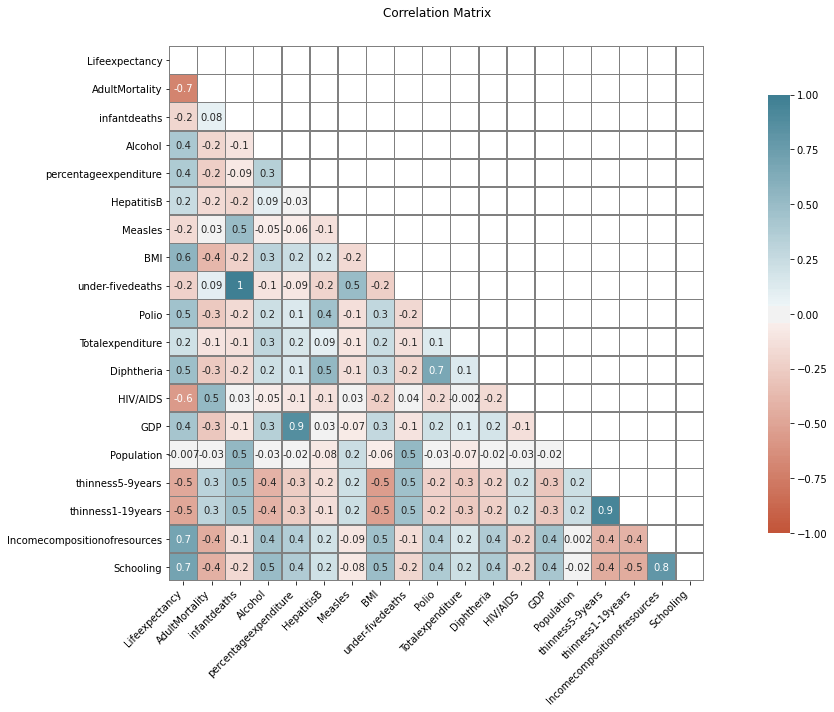

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
cormat = df_selectcols.iloc[ : , :-1].corr()
sns.heatmap(cormat, 
            cmap=sns.diverging_palette(20, 220, n=200),
            fmt='.1g',
            annot = True,
            annot_kws={"size": 10},
            cbar_kws={"shrink": .82},
            vmin=-1, vmax=1, center= 0,
            linewidths=0.5,
            rasterized=False,
            linecolor='grey',
            square=True,
            mask=np.triu(cormat),
            ax=ax)
ax.set_title('Correlation Matrix', fontsize=12, pad=30)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
fig.tight_layout()
plt.show()

__Plot scatter & lines to check on transformations__

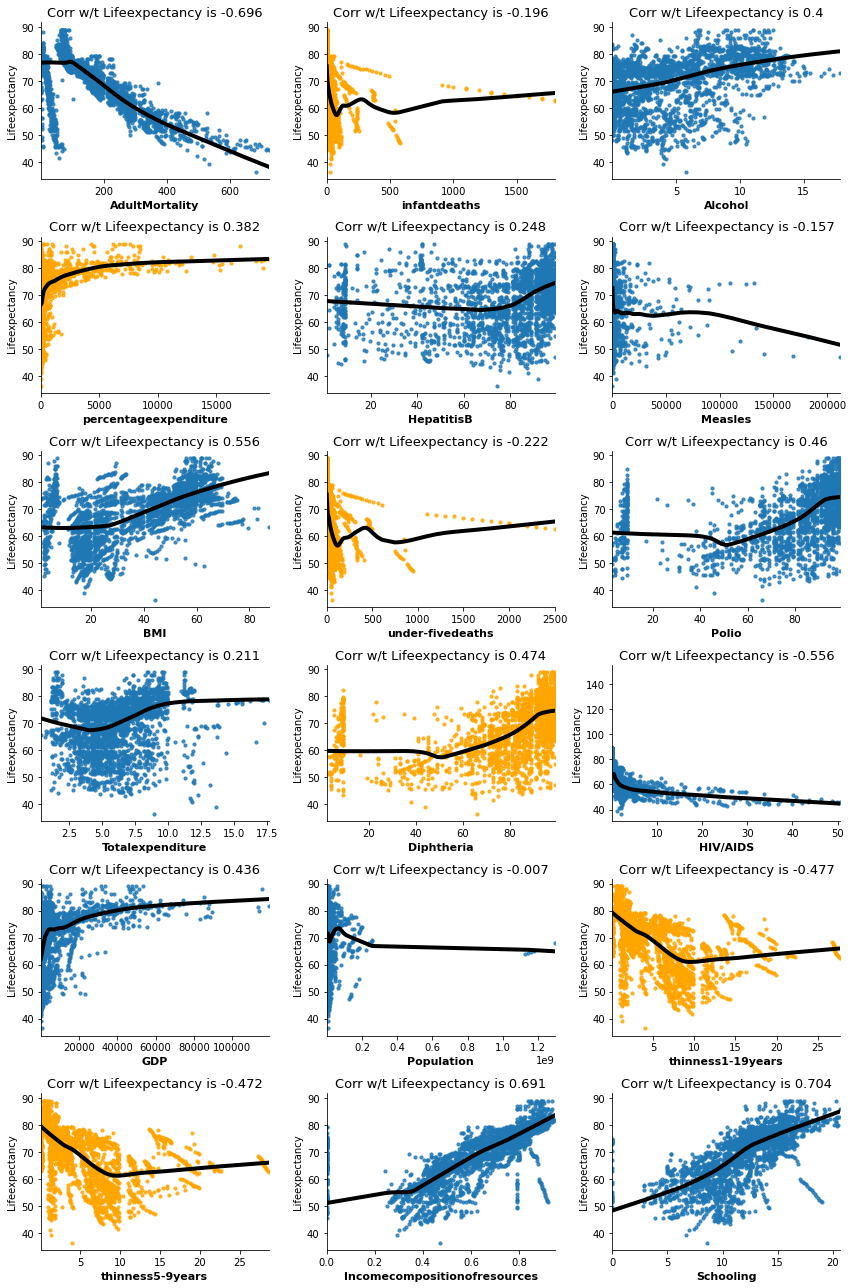

In [5]:
fig, ax = plt.subplots(6, 3, figsize=(12,18))
fig.subplots_adjust(top=0.7)

#Chart-0 plotting, Row-1, Column-1
sns.regplot(
    df_selectcols.AdultMortality,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[0,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "AdultMortality"]].corr().iloc[0,1],3)
ax[0,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].set_xlabel('AdultMortality', fontsize=11, weight='bold')

#Chart-1 plotting, Row-1, Column-2
sns.regplot(
    df_selectcols.infantdeaths,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[0,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "infantdeaths"]].corr().iloc[0,1],3)
ax[0,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].set_xlabel('infantdeaths', fontsize=11, weight='bold')

#Chart-2 plotting, Row-1, Column-3
sns.regplot(
    df_selectcols.Alcohol,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[0,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Alcohol"]].corr().iloc[0,1],3)
ax[0,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].set_xlabel('Alcohol', fontsize=11, weight='bold')

#Chart-3 plotting, Row-2, Column-1
sns.regplot(
    df_selectcols.percentageexpenditure,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10,"color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[1,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "percentageexpenditure"]].corr().iloc[0,1],3)
ax[1,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].set_xlabel('percentageexpenditure', fontsize=11, weight='bold')

#Chart-4 plotting, Row-2, Column-2
sns.regplot(
    df_selectcols.HepatitisB,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[1,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "HepatitisB"]].corr().iloc[0,1],3)
ax[1,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].set_xlabel('HepatitisB', fontsize=11, weight='bold')

#Chart-5 plotting, Row-2, Column-3
sns.regplot(
    df_selectcols.Measles,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[1,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Measles"]].corr().iloc[0,1],3)
ax[1,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].set_xlabel('Measles', fontsize=11, weight='bold')


#Chart-6 plotting, Row-3, Column-1
sns.regplot(
    df_selectcols.BMI,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[2,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "BMI"]].corr().iloc[0,1],3)
ax[2,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)
ax[2,0].set_xlabel('BMI', fontsize=11, weight='bold')

#Chart-7 plotting, Row-3, Column-2
sns.regplot(
    df_selectcols["under-fivedeaths"],
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[2,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "under-fivedeaths"]].corr().iloc[0,1],3)
ax[2,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)
ax[2,1].set_xlabel('under-fivedeaths', fontsize=11, weight='bold')

#Chart-8 plotting, Row-3, Column-3
sns.regplot(
    df_selectcols.Polio,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[2,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Polio"]].corr().iloc[0,1],3)
ax[2,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[2,2].spines['top'].set_visible(False)
ax[2,2].spines['right'].set_visible(False)
ax[2,2].set_xlabel('Polio', fontsize=11, weight='bold')

#Chart-9 plotting, Row-4, Column-1
sns.regplot(
    df_selectcols.Totalexpenditure,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[3,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Totalexpenditure"]].corr().iloc[0,1],3)
ax[3,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[3,0].spines['top'].set_visible(False)
ax[3,0].spines['right'].set_visible(False)
ax[3,0].set_xlabel('Totalexpenditure', fontsize=11, weight='bold')

#Chart-10 plotting, Row-4, Column-2
sns.regplot(
    df_selectcols.Diphtheria,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[3,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Diphtheria"]].corr().iloc[0,1],3)
ax[3,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[3,1].spines['top'].set_visible(False)
ax[3,1].spines['right'].set_visible(False)
ax[3,1].set_xlabel('Diphtheria', fontsize=11, weight='bold')

#Chart-11 plotting, Row-4, Column-3
sns.regplot(
    df_selectcols["HIV/AIDS"],
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[3,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "HIV/AIDS"]].corr().iloc[0,1],3)
ax[3,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[3,2].spines['top'].set_visible(False)
ax[3,2].spines['right'].set_visible(False)
ax[3,2].set_xlabel('HIV/AIDS', fontsize=11, weight='bold')

#Chart-12 plotting, Row-5, Column-1
sns.regplot(
    df_selectcols.GDP,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[4,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "GDP"]].corr().iloc[0,1],3)
ax[4,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[4,0].spines['top'].set_visible(False)
ax[4,0].spines['right'].set_visible(False)
ax[4,0].set_xlabel('GDP', fontsize=11, weight='bold')

#Chart-13 plotting, Row-5, Column-2
sns.regplot(
    df_selectcols.Population,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[4,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Population"]].corr().iloc[0,1],3)
ax[4,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[4,1].spines['top'].set_visible(False)
ax[4,1].spines['right'].set_visible(False)
ax[4,1].set_xlabel('Population', fontsize=11, weight='bold')

#Chart-14 plotting, Row-5, Column-3
sns.regplot(
    df_selectcols["thinness1-19years"],
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[4,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "thinness1-19years"]].corr().iloc[0,1],3)
ax[4,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[4,2].spines['top'].set_visible(False)
ax[4,2].spines['right'].set_visible(False)
ax[4,2].set_xlabel('thinness1-19years', fontsize=11, weight='bold')

#Chart-15 plotting, Row-6, Column-1
sns.regplot(
    df_selectcols["thinness5-9years"],
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[5,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "thinness5-9years"]].corr().iloc[0,1],3)
ax[5,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[5,0].spines['top'].set_visible(False)
ax[5,0].spines['right'].set_visible(False)
ax[5,0].set_xlabel('thinness5-9years', fontsize=11, weight='bold')

#Chart-16 plotting, Row-6, Column-2
sns.regplot(
    df_selectcols.Incomecompositionofresources,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[5,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Incomecompositionofresources"]].corr().iloc[0,1],3)
ax[5,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[5,1].spines['top'].set_visible(False)
ax[5,1].spines['right'].set_visible(False)
ax[5,1].set_xlabel('Incomecompositionofresources', fontsize=11, weight='bold')

#Chart-17 plotting, Row-6, Column-3
sns.regplot(
    df_selectcols.Schooling,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[5,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Schooling"]].corr().iloc[0,1],3)
ax[5,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[5,2].spines['top'].set_visible(False)
ax[5,2].spines['right'].set_visible(False)
ax[5,2].set_xlabel('Schooling', fontsize=11, weight='bold')

fig.tight_layout()
plt.show()

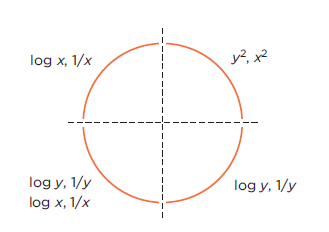

__Transform X variables only as we are not considering a log-log model in this case__

In [6]:
df_selectcols["infantdeaths_t"] = df_selectcols["infantdeaths"] + 1
df_selectcols["infantdeaths_t_log"] = np.log(df_selectcols["infantdeaths_t"])

df_selectcols["percentageexpenditure_t"] = df_selectcols["percentageexpenditure"] + 1
df_selectcols["percentageexpenditure_t_log"] = np.log(df_selectcols["percentageexpenditure_t"])

df_selectcols["underfivedeaths_t"] = df_selectcols["under-fivedeaths"] + 1
df_selectcols["underfivedeaths_t_log"] = np.log(df_selectcols["underfivedeaths_t"])

df_selectcols["thinness1_19years_log"] = np.log(df_selectcols["thinness1-19years"])

df_selectcols["thinness5_9years_log"] = np.log(df_selectcols["thinness5-9years"])

##Adding log of macro economic variables keeping response untransformed
df_selectcols["GDP_log"] = np.log(df_selectcols["GDP"])
df_selectcols["Population_log"] = np.log(df_selectcols["Population"])

df_selectcols.drop(["infantdeaths_t", "percentageexpenditure_t", "underfivedeaths_t"], axis=1, inplace=True)

__Replot scatter & lines to check on transformations__

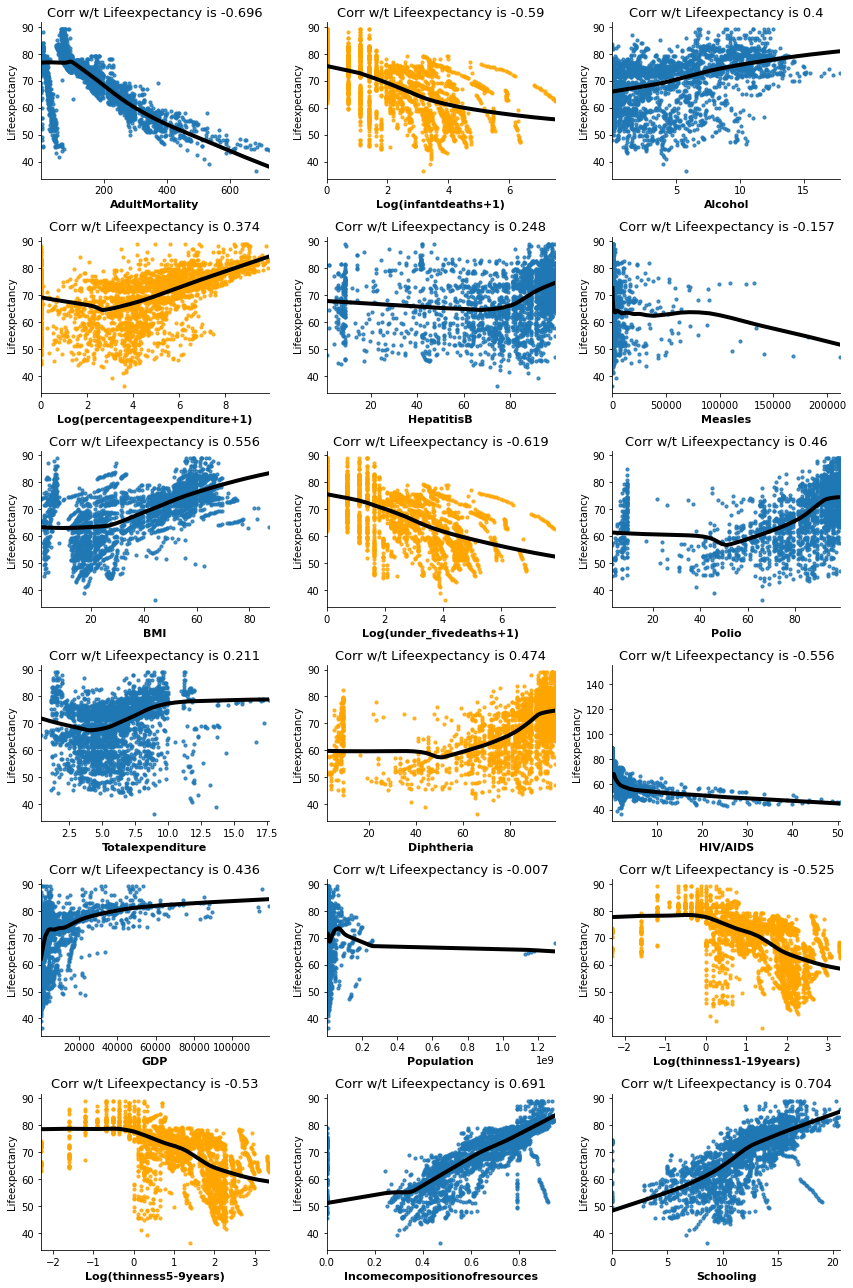

In [7]:
fig, ax = plt.subplots(6, 3, figsize=(12,18))
fig.subplots_adjust(top=0.7)

#Chart-0 plotting, Row-1, Column-1
sns.regplot(
    df_selectcols.AdultMortality,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[0,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "AdultMortality"]].corr().iloc[0,1],3)
ax[0,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].set_xlabel('AdultMortality', fontsize=11, weight='bold')

#Chart-1 plotting, Row-1, Column-2
sns.regplot(
    df_selectcols.infantdeaths_t_log,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[0,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "infantdeaths_t_log"]].corr().iloc[0,1],3)
ax[0,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].set_xlabel('Log(infantdeaths+1)', fontsize=11, weight='bold')

#Chart-2 plotting, Row-1, Column-3
sns.regplot(
    df_selectcols.Alcohol,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[0,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Alcohol"]].corr().iloc[0,1],3)
ax[0,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].set_xlabel('Alcohol', fontsize=11, weight='bold')

#Chart-3 plotting, Row-2, Column-1
sns.regplot(
    df_selectcols.percentageexpenditure_t_log,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10,"color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[1,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "percentageexpenditure_t_log"]].corr().iloc[0,1],3)
ax[1,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].set_xlabel('Log(percentageexpenditure+1)', fontsize=11, weight='bold')

#Chart-4 plotting, Row-2, Column-2
sns.regplot(
    df_selectcols.HepatitisB,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[1,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "HepatitisB"]].corr().iloc[0,1],3)
ax[1,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].set_xlabel('HepatitisB', fontsize=11, weight='bold')

#Chart-5 plotting, Row-2, Column-3
sns.regplot(
    df_selectcols.Measles,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[1,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Measles"]].corr().iloc[0,1],3)
ax[1,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].set_xlabel('Measles', fontsize=11, weight='bold')


#Chart-6 plotting, Row-3, Column-1
sns.regplot(
    df_selectcols.BMI,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[2,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "BMI"]].corr().iloc[0,1],3)
ax[2,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)
ax[2,0].set_xlabel('BMI', fontsize=11, weight='bold')

#Chart-7 plotting, Row-3, Column-2
sns.regplot(
    df_selectcols["underfivedeaths_t_log"],
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[2,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "underfivedeaths_t_log"]].corr().iloc[0,1],3)
ax[2,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)
ax[2,1].set_xlabel('Log(under_fivedeaths+1)', fontsize=11, weight='bold')

#Chart-8 plotting, Row-3, Column-3
sns.regplot(
    df_selectcols.Polio,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[2,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Polio"]].corr().iloc[0,1],3)
ax[2,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[2,2].spines['top'].set_visible(False)
ax[2,2].spines['right'].set_visible(False)
ax[2,2].set_xlabel('Polio', fontsize=11, weight='bold')

#Chart-9 plotting, Row-4, Column-1
sns.regplot(
    df_selectcols.Totalexpenditure,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[3,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Totalexpenditure"]].corr().iloc[0,1],3)
ax[3,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[3,0].spines['top'].set_visible(False)
ax[3,0].spines['right'].set_visible(False)
ax[3,0].set_xlabel('Totalexpenditure', fontsize=11, weight='bold')

#Chart-10 plotting, Row-4, Column-2
sns.regplot(
    df_selectcols.Diphtheria,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[3,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Diphtheria"]].corr().iloc[0,1],3)
ax[3,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[3,1].spines['top'].set_visible(False)
ax[3,1].spines['right'].set_visible(False)
ax[3,1].set_xlabel('Diphtheria', fontsize=11, weight='bold')

#Chart-11 plotting, Row-4, Column-3
sns.regplot(
    df_selectcols["HIV/AIDS"],
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[3,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "HIV/AIDS"]].corr().iloc[0,1],3)
ax[3,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[3,2].spines['top'].set_visible(False)
ax[3,2].spines['right'].set_visible(False)
ax[3,2].set_xlabel('HIV/AIDS', fontsize=11, weight='bold')

#Chart-12 plotting, Row-5, Column-1
sns.regplot(
    df_selectcols.GDP,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[4,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "GDP"]].corr().iloc[0,1],3)
ax[4,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[4,0].spines['top'].set_visible(False)
ax[4,0].spines['right'].set_visible(False)
ax[4,0].set_xlabel('GDP', fontsize=11, weight='bold')

#Chart-13 plotting, Row-5, Column-2
sns.regplot(
    df_selectcols.Population,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[4,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Population"]].corr().iloc[0,1],3)
ax[4,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[4,1].spines['top'].set_visible(False)
ax[4,1].spines['right'].set_visible(False)
ax[4,1].set_xlabel('Population', fontsize=11, weight='bold')

#Chart-14 plotting, Row-5, Column-3
sns.regplot(
    df_selectcols["thinness1_19years_log"],
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[4,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "thinness1_19years_log"]].corr().iloc[0,1],3)
ax[4,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[4,2].spines['top'].set_visible(False)
ax[4,2].spines['right'].set_visible(False)
ax[4,2].set_xlabel('Log(thinness1-19years)', fontsize=11, weight='bold')

#Chart-15 plotting, Row-6, Column-1
sns.regplot(
    df_selectcols["thinness5_9years_log"],
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[5,0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "thinness5_9years_log"]].corr().iloc[0,1],3)
ax[5,0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[5,0].spines['top'].set_visible(False)
ax[5,0].spines['right'].set_visible(False)
ax[5,0].set_xlabel('Log(thinness5-9years)', fontsize=11, weight='bold')

#Chart-16 plotting, Row-6, Column-2
sns.regplot(
    df_selectcols.Incomecompositionofresources,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[5,1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Incomecompositionofresources"]].corr().iloc[0,1],3)
ax[5,1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[5,1].spines['top'].set_visible(False)
ax[5,1].spines['right'].set_visible(False)
ax[5,1].set_xlabel('Incomecompositionofresources', fontsize=11, weight='bold')

#Chart-17 plotting, Row-6, Column-3
sns.regplot(
    df_selectcols.Schooling,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10},
    line_kws={"lw":4, "color":"black"},
    ax=ax[5,2]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Schooling"]].corr().iloc[0,1],3)
ax[5,2].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[5,2].spines['top'].set_visible(False)
ax[5,2].spines['right'].set_visible(False)
ax[5,2].set_xlabel('Schooling', fontsize=11, weight='bold')

fig.tight_layout()
plt.show()

__Check vif function to remove variables which are linear combination of other independent variables__

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]].head(4)

__The variables printed here are highly related to others which may impact partial coefficients__

In [9]:
##Run the vif on original set of attributes without any transformation and removing Life expectancy
vif_data = df_selectcols.loc[ : , [
    "AdultMortality",
    "infantdeaths",
    "Alcohol",
    "percentageexpenditure",
    "HepatitisB",
    "Measles",
    "BMI",
    "under-fivedeaths",
    "Polio",
    "Totalexpenditure",
    "Diphtheria",
    "HIV/AIDS",
    "GDP",
    "Population",
    "thinness5-9years",
    "thinness1-19years",
    "Incomecompositionofresources",
    "Schooling",
    "Status_Dummy"]]

##Source Code: https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python
calculate_vif_(vif_data, thresh=10)

dropping 'infantdeaths' at index: 1
dropping 'Schooling' at index: 16
dropping 'Diphtheria' at index: 9
dropping 'thinness1-19years' at index: 13
dropping 'Polio' at index: 7
dropping 'Incomecompositionofresources' at index: 12
Remaining variables:
Index(['AdultMortality', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Totalexpenditure', 'HIV/AIDS',
       'GDP', 'Population', 'thinness5-9years', 'Status_Dummy'],
      dtype='object')


AdultMortality  Alcohol  percentageexpenditure  HepatitisB  Measles   BMI  \
0           263.0     0.01              71.279624        65.0     1154  19.1   
1           271.0     0.01              73.523582        62.0      492  18.6   
2           268.0     0.01              73.219243        64.0      430  18.1   
3           272.0     0.01              78.184215        67.0     2787  17.6   

   under-fivedeaths  Totalexpenditure  HIV/AIDS         GDP  Population  \
0                83              8.16       0.1  584.259210  33736494.0   
1                86              8.18       0.1  612.696514    327582.0   
2                89              8.13       0.1  631.744976  31731688.0   
3                93              8.52       0.1  669.959000   3696958.0   

   thinness5-9years  Status_Dummy  
0              17.3             0  
1              17.5             0  
2              17.7             0  
3              18.0             0

__Split training and test sets__

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_selectcols.rename(columns = {'HIV/AIDS':'HIV_AIDS'}, inplace = True)

y = df_selectcols.loc[:, ["Lifeexpectancy"]]

##Dropping infantdeaths, infantdeaths_t_log, Schooling, Diphtheria, thinness1-19years, thinness1_19years_log, Polio
##thinness5-9years, under-fivedeaths, percentageexpenditure, Incomecompositionofresources
X = df_selectcols.loc[:, ["AdultMortality", "Alcohol", "percentageexpenditure_t_log", "HepatitisB", "Measles",
                         "BMI", "underfivedeaths_t_log", "Totalexpenditure", "HIV_AIDS", "GDP", "Population",
                         "thinness5_9years_log", "Status_Dummy",
                         "infantdeaths_t_log", "Schooling", "Diphtheria", "thinness1_19years_log", "Polio",
                          "Incomecompositionofresources",
                          "GDP_log", "Population_log"]]

##Push 20% to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 21), (588, 21), (2350, 1), (588, 1))

__Import statsmodel and sklearn model metrics__

In [12]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

__Function to evaluate vif of explanatory variables when more than one X(s) are fitted in OLS__

In [13]:
##Source Code: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

__Function to plot a diagonal line depending on the xlimits and ylimits__

In [14]:
##Source Code: https://stackoverflow.com/questions/22104256/does-matplotlib-have-a-function-for-drawing-diagonal-lines-in-axis-coordinates
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

__Function to plot model results and compare training vs testing__

In [15]:
def plot_model_results():
    
    fig, ax = plt.subplots(2, 3, figsize=(18,15))
    fig.subplots_adjust(top=0.7)

    #Chart-0 plotting, Row-1, Column-1
    ax[0,0].scatter(y_train, model.fittedvalues, c="grey")
    add_identity(ax[0,0], color='r', ls='--')
    ax[0,0].set_title("Actual vs Predicted (Training)", fontsize=14)
    ax[0,0].spines['top'].set_visible(False)
    ax[0,0].spines['right'].set_visible(False)
    ax[0,0].set_xlabel('Actual Life Expectancy', fontsize=11, weight='bold')
    ax[0,0].set_ylabel('Predicted Life Expectancy', fontsize=11, weight='bold')

    ax[0,1].scatter(model.fittedvalues, model.resid)
    ax[0,1].set_title("Residual vs Predicted (Training)", fontsize=14)
    ax[0,1].spines['top'].set_visible(False)
    ax[0,1].spines['right'].set_visible(False)
    ax[0,1].set_xlabel('Fitted Values', fontsize=11, weight='bold')
    ax[0,1].set_ylabel('Residuals', fontsize=11, weight='bold')
    ax[0,1].axhline(y=0, color='black', linestyle='solid', linewidth=1)

    sm.qqplot(model.resid, stats.t, fit=True, line='45', ax=ax[0,2])
    ax[0,2].set_title("QQ Plot (Training)", fontsize=13)
    ax[0,2].set_xlabel('Theoretical Quantiles', fontsize=11, weight='bold')
    ax[0,2].set_ylabel('Sample Quantiles', fontsize=11, weight='bold')

    
    x_data = pd.DataFrame(np.array(predictions))
    y_data = y_test.reset_index(drop=True)
    xx = y_data.values - x_data.values
    
    
    ax[1,0].scatter(y_test, x_data, c="grey")
    add_identity(ax[1,0], color='r', ls='--')
    ax[1,0].set_title("Actual vs Predicted (Test)", fontsize=14)
    ax[1,0].spines['top'].set_visible(False)
    ax[1,0].spines['right'].set_visible(False)
    ax[1,0].set_xlabel('Actual Life Expectancy', fontsize=11, weight='bold')
    ax[1,0].set_ylabel('Predicted Life Expectancy', fontsize=11, weight='bold')

    
#     ax[1,1].scatter(np.array(predictions), (np.array(y_test) - np.array(predictions)))
    ax[1,1].scatter(x_data.values, xx)
    ax[1,1].set_title("Residual vs Predicted (Test)", fontsize=14)
    ax[1,1].spines['top'].set_visible(False)
    ax[1,1].spines['right'].set_visible(False)
    ax[1,1].set_xlabel('Fitted Values', fontsize=11, weight='bold')
    ax[1,1].set_ylabel('Residuals', fontsize=11, weight='bold')
    ax[1,1].axhline(y=0, color='black', linestyle='solid', linewidth=1)

#     sm.qqplot((np.array(y_test) - np.array(predictions)), stats.t, fit=True, line='45', ax=ax[1,2])
    sm.qqplot(xx, stats.t, fit=True, line='45', ax=ax[1,2])
    ax[1,2].set_title("QQ Plot (Test)", fontsize=14)
    ax[1,2].set_xlabel('Theoretical Quantiles', fontsize=11, weight='bold')
    ax[1,2].set_ylabel('Sample Quantiles', fontsize=11, weight='bold')

    plt.show()

__Function to print training and test RMSE__

In [16]:
def rmse_print():
    a = round(mean_squared_error(y_train, model.fittedvalues, squared=False),3)
    ##Select column from testing set and add intercept before using prediction
    b = round(mean_squared_error(y_test, predictions, squared=False),3)
    
    print(f"Training RMSE is {a}")
    print(f"Testing RMSE is {b}")

__Function to test Heteroskedasticity__

In [17]:
def test_heterosk():
    
    ##Null Hypothesis - Errors are homoskedastic i.e having constant variance
    ##Alternate Hypothesis - Errors are heteroskedastic i.e. variance of error terms is a linear function of my explanatory vars
    name_gq = ['F statistic', 'p-value']
    test_gq = sms.het_goldfeldquandt(model.resid, model.model.exog)
    result1 = lzip(name_gq, test_gq)
    print(f"Goldfeld Quandt test results are: \n {result1}")

    ##Null Hypothesis - Errors are homoskedastic i.e having constant variance
    ##Alternate Hypothesis - Errors are heteroskedastic i.e. variance of error terms is a linear function of my explanatory vars
    name_bp = ['Lagrange multiplier statistic', 'p-value',
            'f-value', 'f p-value']
    test_bp = sms.het_breuschpagan(model.resid, model.model.exog)
    result2 = lzip(name_bp, test_bp)
    print(f"Breusch Pagan test results are: \n {result2}")

__Iteration-1 : Fit AdultMortality to y = intercept + epsilon model__

In [18]:
# features
X_iter = X_train[['AdultMortality']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     2241.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:25   Log-Likelihood:                -7837.0
No. Observations:                2350   AIC:                         1.568e+04
Df Residuals:                    2348   BIC:                         1.569e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             77.8909      0.233    334.

 - __Print RMSE values for Iteration-1__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 6.793
Testing RMSE is 6.979
Goldfeld Quandt test results are: 
 [('F statistic', 1.0975327245326678), ('p-value', 0.055572994349676844)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 143.12792199767765), ('p-value', 5.511394044171315e-33), ('f-value', 152.2808522525489), ('f p-value', 6.055188455826799e-34)]


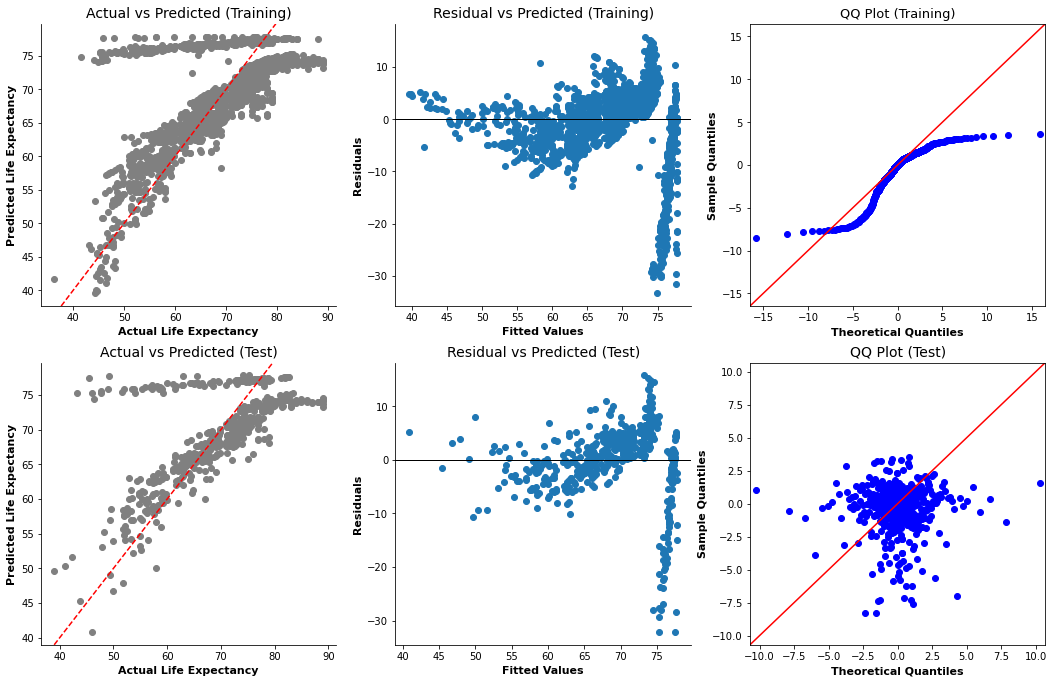

In [19]:
sel = ['AdultMortality']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-2 : Fit Alcohol to (y = intercept + AdultMortality + epsilon) model__

In [20]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1474.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:27   Log-Likelihood:                -7668.4
No. Observations:                2350   AIC:                         1.534e+04
Df Residuals:                    2347   BIC:                         1.536e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             74.3494      0.286    260.

__Print VIF values of explanatory variables__

In [21]:
get_vif(exogs=['AdultMortality', 'Alcohol'], data=X_iter)

VIF  Tolerance
AdultMortality  1.040578   0.961004
Alcohol         1.040578   0.961004

 - __Print RMSE values for Iteration-2__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 6.323
Testing RMSE is 6.354
Goldfeld Quandt test results are: 
 [('F statistic', 1.1613262214296523), ('p-value', 0.005258311909535535)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 131.50240130806768), ('p-value', 2.783661208710359e-29), ('f-value', 69.55971826429116), ('f p-value', 4.4880395033060275e-30)]


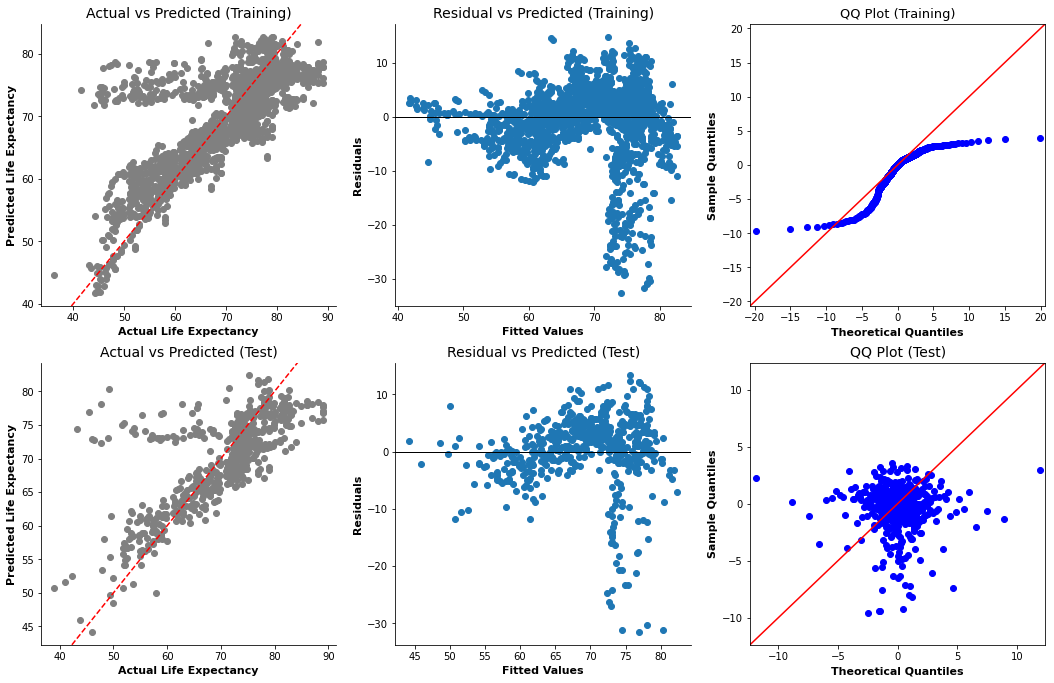

In [22]:
sel = ['AdultMortality', 'Alcohol']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-3 : Fit Totalexpenditure to (y = intercept + AdultMortality + Alcohol + epsilon) model__

In [23]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     998.8
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:28   Log-Likelihood:                -7657.3
No. Observations:                2350   AIC:                         1.532e+04
Df Residuals:                    2346   BIC:                         1.535e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               72.9474      0.411  

__Print VIF values of explanatory variables__

In [24]:
get_vif(exogs=['AdultMortality', 'Alcohol', 'Totalexpenditure'], data=X_iter)

VIF  Tolerance
AdultMortality    1.044581   0.957322
Alcohol           1.120786   0.892231
Totalexpenditure  1.091288   0.916348

 - __Print RMSE values for Iteration-3__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 6.293
Testing RMSE is 6.349
Goldfeld Quandt test results are: 
 [('F statistic', 1.1622325912969758), ('p-value', 0.005076158450876125)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 136.05750241912494), ('p-value', 2.675762556876267e-29), ('f-value', 48.057692107185865), ('f p-value', 3.8820391559564674e-30)]


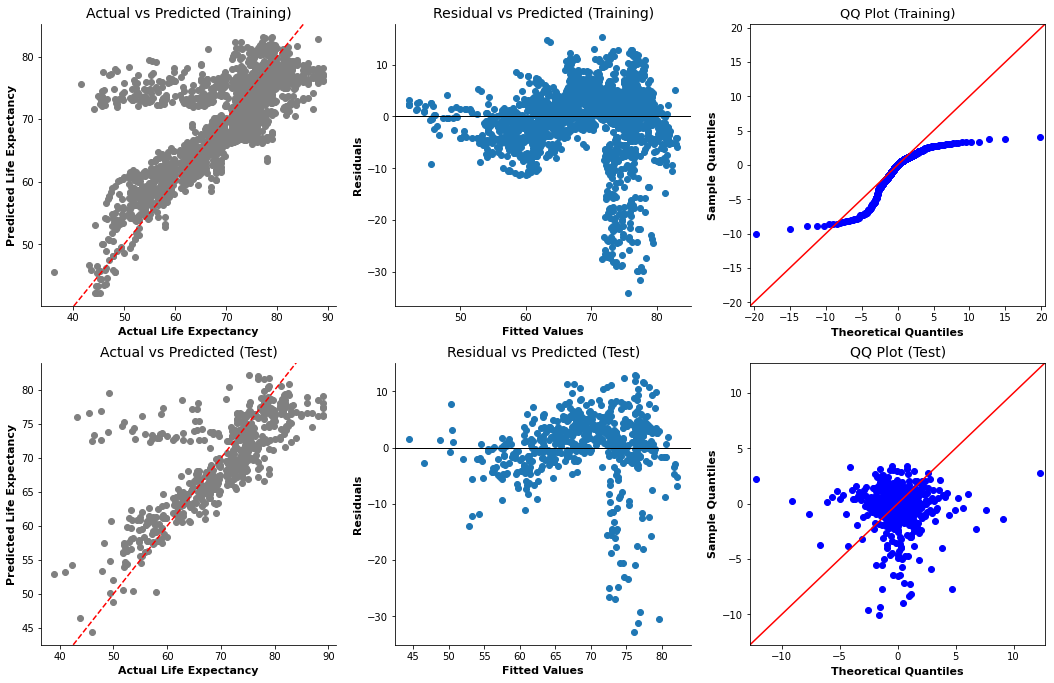

In [25]:
sel = ['AdultMortality', 'Alcohol', 'Totalexpenditure']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-4 : Fit underfivedeaths_t_log to (y = intercept + AdultMortality + Alcohol + Totalexpenditure + epsilon) model__

In [26]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1078.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:31   Log-Likelihood:                -7398.0
No. Observations:                2350   AIC:                         1.481e+04
Df Residuals:                    2345   BIC:                         1.483e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    76.66

__Print VIF values of explanatory variables__

In [27]:
get_vif(exogs=['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log'], data=X_iter)

VIF  Tolerance
AdultMortality         1.198922   0.834083
Alcohol                1.233793   0.810509
Totalexpenditure       1.097662   0.911027
underfivedeaths_t_log  1.348231   0.741713

 - __Print RMSE values for Iteration-4__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 5.636
Testing RMSE is 5.757
Goldfeld Quandt test results are: 
 [('F statistic', 1.0863705500403458), ('p-value', 0.07834129852369522)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 339.7094536031635), ('p-value', 2.9218399524846116e-72), ('f-value', 99.06760370127166), ('f p-value', 5.316397787113059e-78)]


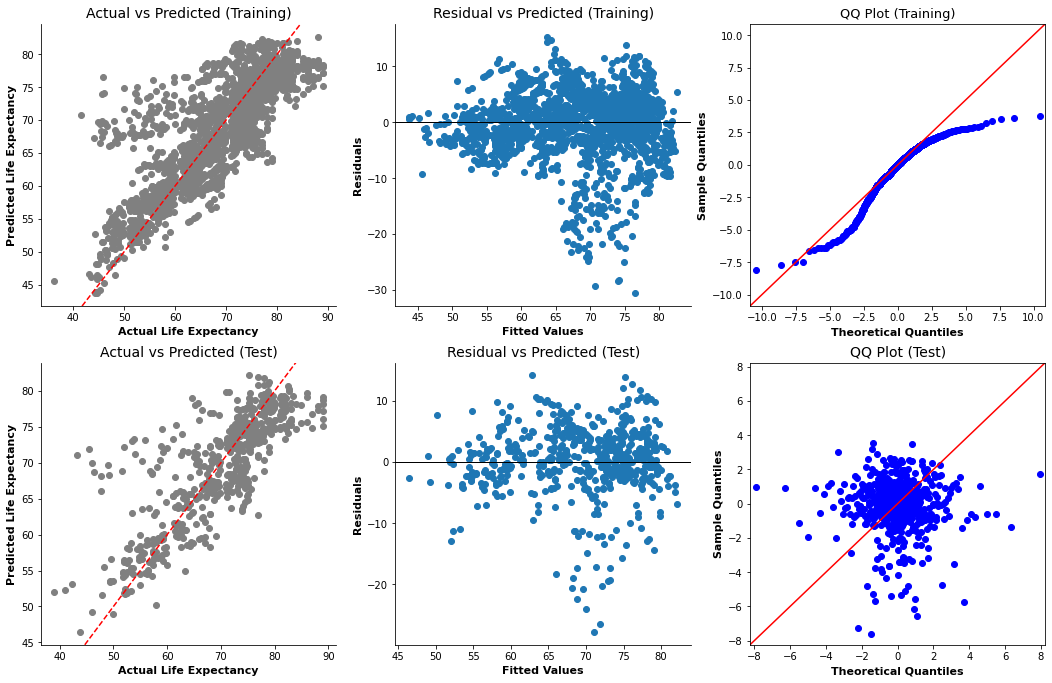

In [28]:
sel = ['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-5 : Fit BMI to (y = intercept + AdultMortality + Alcohol +
                                            Totalexpenditure + underfivedeaths_t_log + epsilon) model__

In [29]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI']]
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     968.5
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:33   Log-Likelihood:                -7307.9
No. Observations:                2350   AIC:                         1.463e+04
Df Residuals:                    2344   BIC:                         1.466e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    72.60

__Print VIF values of explanatory variables__

In [30]:
get_vif(exogs=['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI'], data=X_iter)

VIF  Tolerance
AdultMortality         1.265960   0.789914
Alcohol                1.256614   0.795789
Totalexpenditure       1.114040   0.897634
underfivedeaths_t_log  1.521366   0.657304
BMI                    1.467645   0.681364

 - __Print RMSE values for Iteration-5__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 5.424
Testing RMSE is 5.629
Goldfeld Quandt test results are: 
 [('F statistic', 1.0924796255542921), ('p-value', 0.06532908498315469)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 425.8572771279441), ('p-value', 7.907477718324156e-90), ('f-value', 103.75628020960228), ('f p-value', 4.025422002940852e-99)]


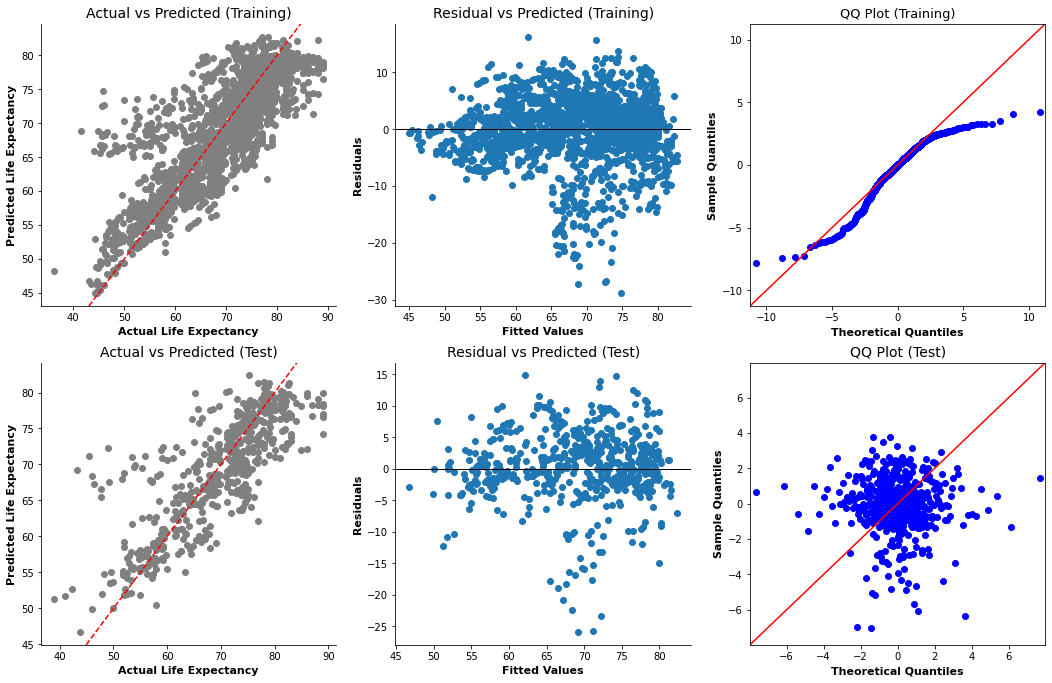

In [31]:
sel = ['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-6 : Fit HepatitisB to (y = intercept + AdultMortality + Alcohol + Totalexpenditure + log(underfivedeaths+1) + BMI + epsilon) model__

In [32]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     861.8
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:35   Log-Likelihood:                -7255.0
No. Observations:                2350   AIC:                         1.452e+04
Df Residuals:                    2343   BIC:                         1.456e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    71.92

__Print VIF values of explanatory variables__

In [33]:
get_vif(exogs=['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'GDP'], data=X_iter).iloc[:, 0]

AdultMortality           1.294697
Alcohol                  1.324068
Totalexpenditure         1.114108
underfivedeaths_t_log    1.549619
BMI                      1.473769
GDP                      1.238096
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-6__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 5.303
Testing RMSE is 5.511
Goldfeld Quandt test results are: 
 [('F statistic', 1.0750473068759376), ('p-value', 0.10819796553710975)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 430.4236960953062), ('p-value', 8.006085520623727e-90), ('f-value', 87.56122535130135), ('f p-value', 2.7266445324788575e-99)]


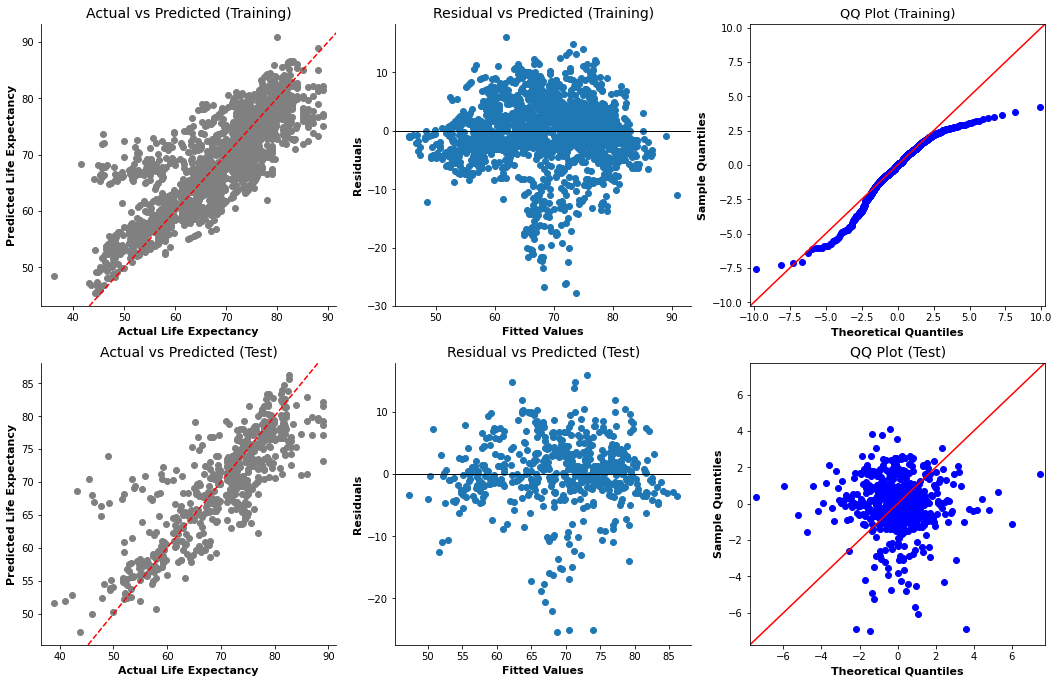

In [34]:
sel = ['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-7 : Fit Population to (y = intercept + AdultMortality + Alcohol + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + epsilon) model__

In [35]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     752.7
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:37   Log-Likelihood:                -7239.4
No. Observations:                2350   AIC:                         1.449e+04
Df Residuals:                    2342   BIC:                         1.454e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    71.92

__Print VIF values of explanatory variables__

In [36]:
get_vif(exogs=['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'GDP', 'Population'], data=X_iter).iloc[:, 0]

AdultMortality           1.316524
Alcohol                  1.328873
Totalexpenditure         1.117561
underfivedeaths_t_log    1.687161
BMI                      1.475409
GDP                      1.239838
Population               1.101484
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-7__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 5.268
Testing RMSE is 5.486
Goldfeld Quandt test results are: 
 [('F statistic', 1.074202104687692), ('p-value', 0.11081371534563125)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 438.8359406838153), ('p-value', 1.108011645079266e-90), ('f-value', 76.82331972881687), ('f p-value', 1.6331157159280654e-100)]


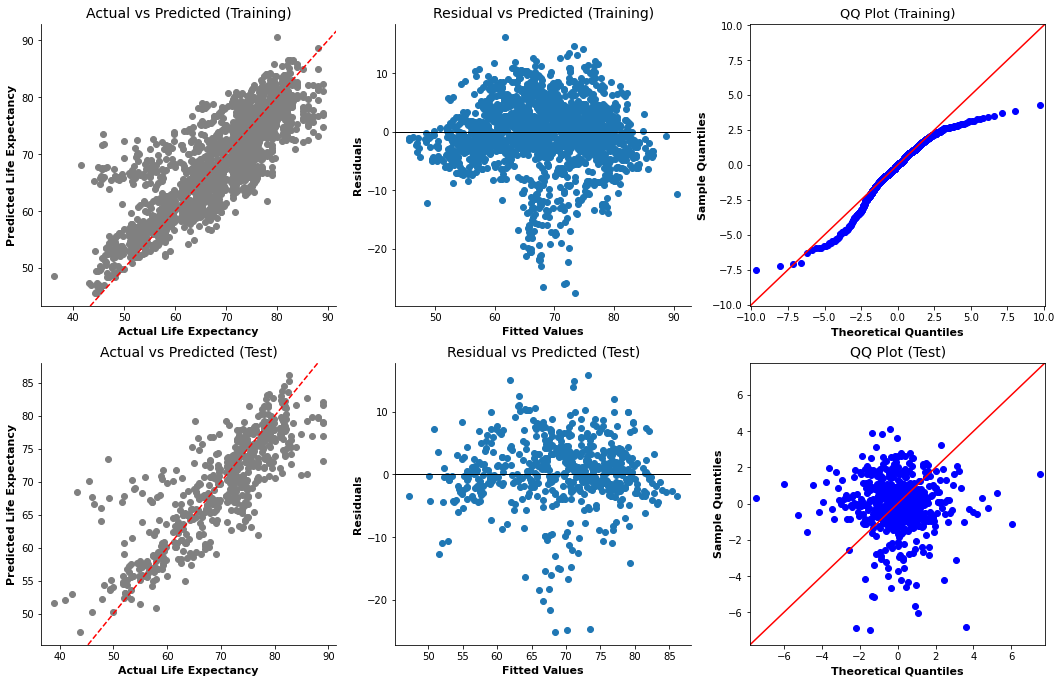

In [37]:
sel = ['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-8 : Fit thinness5_9years_log to (y = intercept + AdultMortality + Alcohol + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + epsilon) model__

In [38]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                 'thinness5_9years_log']]
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                  'thinness5_9years_log']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     663.8
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:40   Log-Likelihood:                -7232.6
No. Observations:                2350   AIC:                         1.448e+04
Df Residuals:                    2341   BIC:                         1.454e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    72.98

__Print VIF values of explanatory variables__

In [39]:
get_vif(exogs=['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'GDP', 'Population', 'thinness5_9years_log'], data=X_iter).iloc[:, 0]

AdultMortality           1.339883
Alcohol                  1.366373
Totalexpenditure         1.159421
underfivedeaths_t_log    1.724479
BMI                      1.675197
GDP                      1.257099
Population               1.102746
thinness5_9years_log     1.795625
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-8__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 5.253
Testing RMSE is 5.423
Goldfeld Quandt test results are: 
 [('F statistic', 1.0752554014034479), ('p-value', 0.10778166883949777)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 438.0687388893609), ('p-value', 1.3302378877068862e-89), ('f-value', 67.04731876345483), ('f p-value', 2.3650331365820907e-99)]


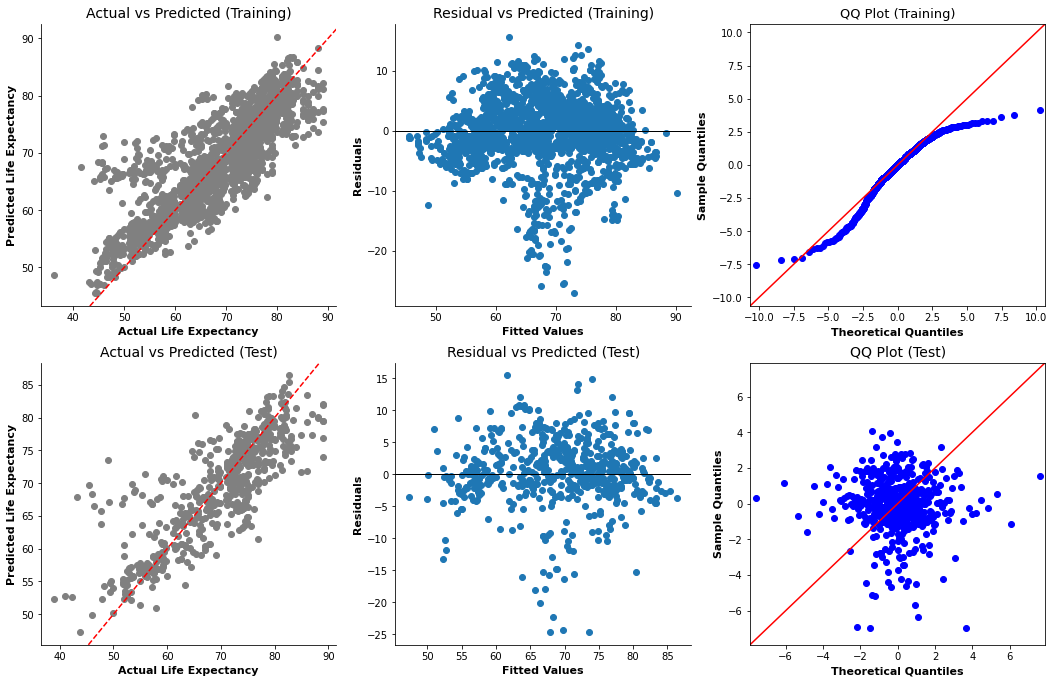

In [40]:
sel = ['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
      'thinness5_9years_log']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-9 : Fit HIV_AIDS to (y = intercept + AdultMortality + Alcohol + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + log(thinness5_9years) + epsilon) model__

In [41]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                 'thinness5_9years_log', 'HIV_AIDS']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                  'thinness5_9years_log', 'HIV_AIDS']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     757.3
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:42   Log-Likelihood:                -7021.3
No. Observations:                2350   AIC:                         1.406e+04
Df Residuals:                    2340   BIC:                         1.412e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    71.52

__Print VIF values of explanatory variables__

In [42]:
get_vif(exogs=['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'GDP', 'Population', 'thinness5_9years_log', 'HIV_AIDS'], data=X_iter).iloc[:, 0]

AdultMortality           1.692105
Alcohol                  1.374474
Totalexpenditure         1.166978
underfivedeaths_t_log    1.724523
BMI                      1.678915
GDP                      1.257454
Population               1.103190
thinness5_9years_log     1.802898
HIV_AIDS                 1.403528
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-9__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 4.801
Testing RMSE is 5.092
Goldfeld Quandt test results are: 
 [('F statistic', 1.1244690496227674), ('p-value', 0.022694483827762135)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 427.2703789766956), ('p-value', 2.0642699393964933e-86), ('f-value', 57.77738966481259), ('f p-value', 1.3348157793714744e-95)]


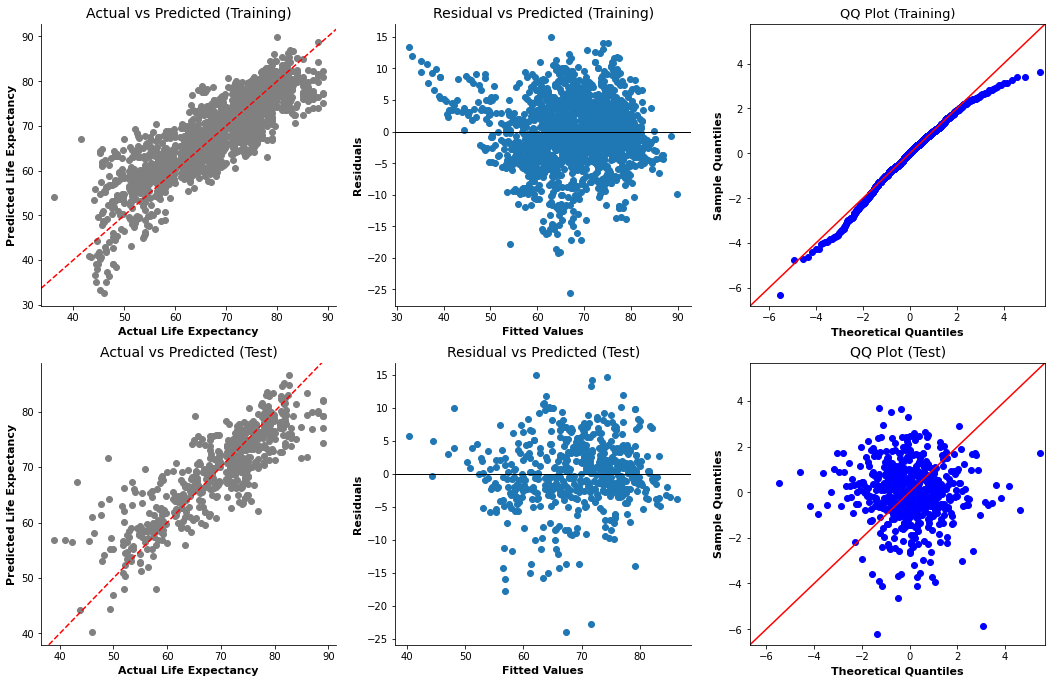

In [43]:
sel = ['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
      'thinness5_9years_log', 'HIV_AIDS']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-10 : Fit Measles to (y = intercept + AdultMortality + Alcohol + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + log(thinness5_9years) + HIV_AIDS + epsilon) model__

In [44]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                 'thinness5_9years_log', 'HIV_AIDS', 'Measles']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                  'thinness5_9years_log', 'HIV_AIDS', 'Measles']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     682.7
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:44   Log-Likelihood:                -7019.4
No. Observations:                2350   AIC:                         1.406e+04
Df Residuals:                    2339   BIC:                         1.412e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    71.52

__Print VIF values of explanatory variables__

In [45]:
get_vif(exogs=['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'GDP', 'Population', 'thinness5_9years_log', 'HIV_AIDS',
              'Measles'], data=X_iter).iloc[:, 0]

AdultMortality           1.708127
Alcohol                  1.388791
Totalexpenditure         1.170608
underfivedeaths_t_log    1.917592
BMI                      1.681670
GDP                      1.258049
Population               1.116736
thinness5_9years_log     1.802900
HIV_AIDS                 1.403589
Measles                  1.208819
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-10__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 4.797
Testing RMSE is 5.112
Goldfeld Quandt test results are: 
 [('F statistic', 1.1194622926724125), ('p-value', 0.02716932047414357)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 434.62393331770363), ('p-value', 3.9697756259905242e-87), ('f-value', 53.07497559949043), ('f p-value', 1.2661951436662691e-96)]


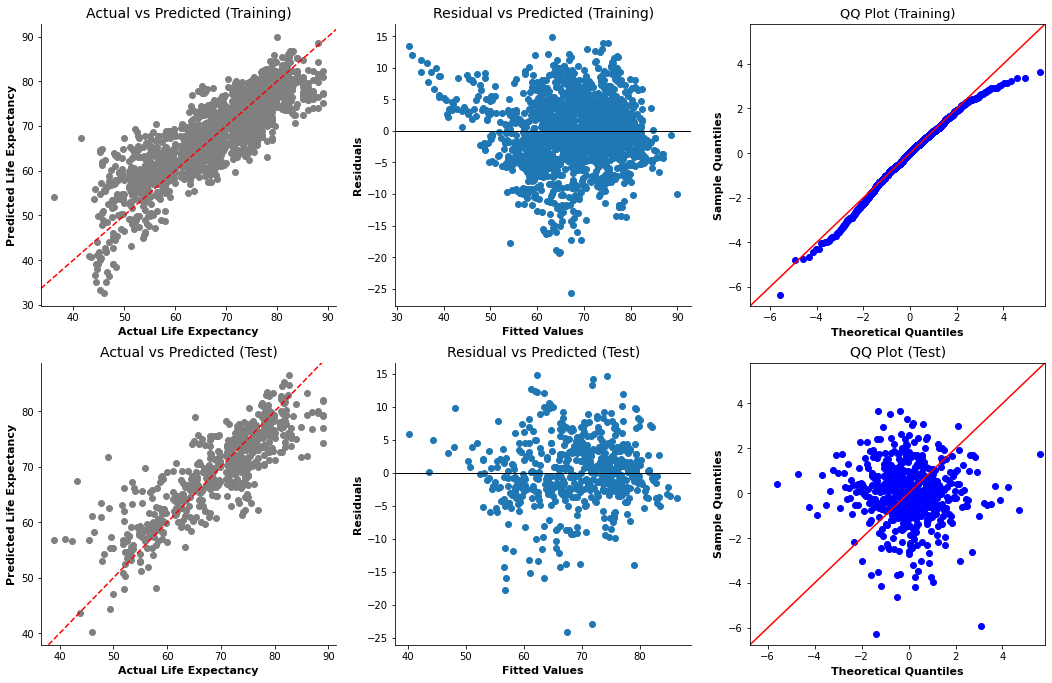

In [46]:
sel = ['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
      'thinness5_9years_log', 'HIV_AIDS', 'Measles']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-11 : Fit Status_Dummy to (y = intercept + AdultMortality + Alcohol + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + log(thinness5_9years) + HIV_AIDS + Measles + epsilon) model__

In [47]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                 'thinness5_9years_log', 'HIV_AIDS', 'Measles', 'Status_Dummy']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                  'thinness5_9years_log', 'HIV_AIDS', 'Measles', 'Status_Dummy']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     638.0
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:47   Log-Likelihood:                -6994.9
No. Observations:                2350   AIC:                         1.401e+04
Df Residuals:                    2338   BIC:                         1.408e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    71.45

__Print VIF values of explanatory variables__

In [48]:
get_vif(exogs=['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'GDP', 'Population', 'thinness5_9years_log', 'HIV_AIDS',
              'Measles', 'Status_Dummy'], data=X_iter).iloc[:, 0]

AdultMortality           1.726748
Alcohol                  1.663905
Totalexpenditure         1.187083
underfivedeaths_t_log    1.917972
BMI                      1.685813
GDP                      1.361270
Population               1.116892
thinness5_9years_log     1.852501
HIV_AIDS                 1.403964
Measles                  1.208820
Status_Dummy             1.838941
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-11__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 4.747
Testing RMSE is 5.071
Goldfeld Quandt test results are: 
 [('F statistic', 1.110584431454227), ('p-value', 0.0369150199991019)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 436.5476610964671), ('p-value', 1.0484201720845007e-86), ('f-value', 48.491524545457466), ('f p-value', 2.9860217195517252e-96)]


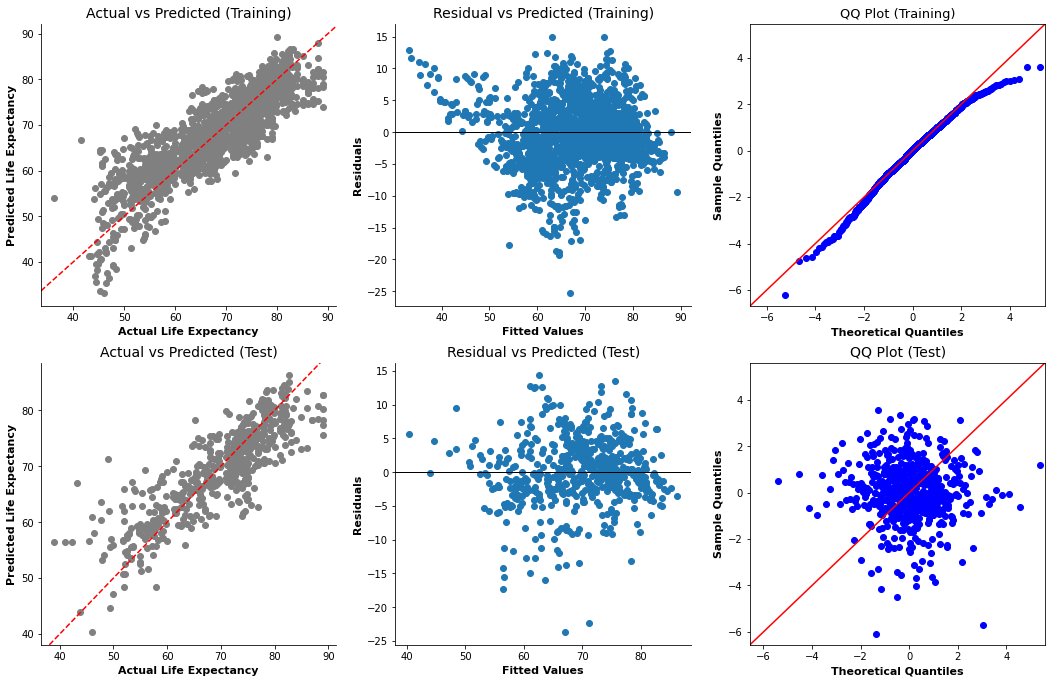

In [49]:
sel = ['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
      'thinness5_9years_log', 'HIV_AIDS', 'Measles', 'Status_Dummy']
rmse_print()
test_heterosk()
plot_model_results()

- __Now need to check with vars which may blow up VIF at the cost of Adjusted R squared__
- percentageexpenditure, HepatitisB, infantdeaths, Schooling, Diphtheria, thinness1-19years, Polio
- __Currently we have slightly overfitted model because gap between training and testing RMSE is slightly high__
 - Goldfeld Quandt test suggests we may not have any more heteroskedastic errors

__Can we raise adjusted R squared from 0.75 and reduce the gap between training and testing RMSE?__

__Iteration-1.1 : Fit Schooling to (y = intercept + AdultMortality + Alcohol + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + log(thinness5_9years) + HIV_AIDS + Measles + Status_Dummy + epsilon) model__

In [50]:
# features
X_iter = X_train[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                 'thinness5_9years_log', 'HIV_AIDS', 'Measles', 'Status_Dummy',
                 'Schooling']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Alcohol', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                  'thinness5_9years_log', 'HIV_AIDS', 'Measles', 'Status_Dummy',
                  'Schooling']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     764.3
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:49   Log-Likelihood:                -6751.1
No. Observations:                2350   AIC:                         1.353e+04
Df Residuals:                    2337   BIC:                         1.360e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    61.91

__Adding Schooling makes Alcohol and thinness5_9years_log insignificant, Adjusted R square rises from 0.75 to 0.79__

__Remove Alcohol and thinness5_9years_log and check if we get same adjusted R squared with schooling__

In [51]:
# features
X_iter = X_train[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                 'HIV_AIDS', 'Measles', 'Status_Dummy',
                 'Schooling']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                  'HIV_AIDS', 'Measles', 'Status_Dummy',
                  'Schooling']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     917.5
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:49   Log-Likelihood:                -6751.5
No. Observations:                2350   AIC:                         1.352e+04
Df Residuals:                    2339   BIC:                         1.359e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    61.69

__Print VIF values of explanatory variables__

In [52]:
get_vif(exogs=['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'GDP', 'Population', 'HIV_AIDS',
              'Measles', 'Status_Dummy',
              'Schooling'], data=X_iter).iloc[:, 0]

AdultMortality           1.751391
Totalexpenditure         1.136571
underfivedeaths_t_log    1.930813
BMI                      1.558087
GDP                      1.388099
Population               1.116458
HIV_AIDS                 1.392687
Measles                  1.211345
Status_Dummy             1.550548
Schooling                1.842495
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-1.1__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 4.28
Testing RMSE is 4.405
Goldfeld Quandt test results are: 
 [('F statistic', 1.111098289699787), ('p-value', 0.03622198732038827)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 301.8111058299234), ('p-value', 6.437961068528732e-59), ('f-value', 34.46636091746973), ('f p-value', 3.33930320791599e-63)]


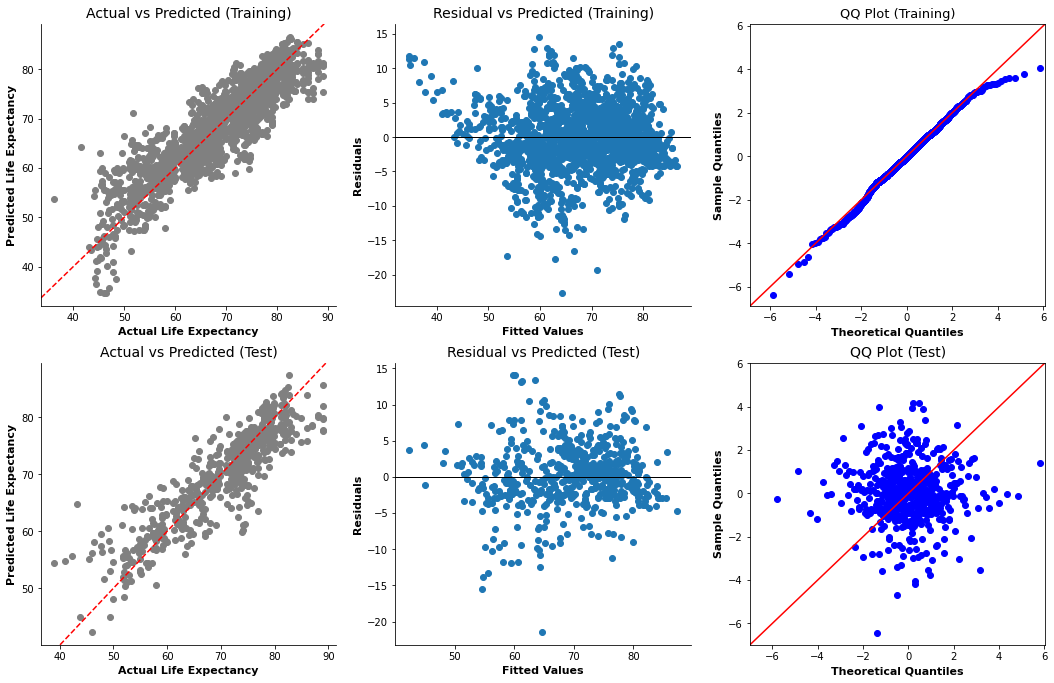

In [53]:
sel = ['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
      'HIV_AIDS', 'Measles', 'Status_Dummy',
      'Schooling']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-1.1 : (y = intercept + AdultMortality + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + HIV_AIDS + Measles + Status_Dummy + Schooling + epsilon) model__

__Iteration-1.2 : Fit Incomecompositionofresources to (y = intercept + AdultMortality + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + HIV_AIDS + Measles + Status_Dummy + Schooling + epsilon) model__

In [54]:
# features
X_iter = X_train[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                 'HIV_AIDS', 'Measles', 'Status_Dummy',
                 'Schooling', 'Incomecompositionofresources']]
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                  'HIV_AIDS', 'Measles', 'Status_Dummy',
                  'Schooling', 'Incomecompositionofresources']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     898.1
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:51   Log-Likelihood:                -6681.4
No. Observations:                2350   AIC:                         1.339e+04
Df Residuals:                    2338   BIC:                         1.346e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

__Print VIF values of explanatory variables__

In [55]:
get_vif(exogs=['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'GDP', 'Population', 'HIV_AIDS',
              'Measles', 'Status_Dummy',
              'Schooling', 'Incomecompositionofresources'], data=X_iter).iloc[:, 0]

AdultMortality                  1.778421
Totalexpenditure                1.142932
underfivedeaths_t_log           1.954288
BMI                             1.578969
GDP                             1.419649
Population                      1.116654
HIV_AIDS                        1.394928
Measles                         1.218529
Status_Dummy                    1.562657
Schooling                       3.388151
Incomecompositionofresources    3.169663
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-1.2__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 4.155
Testing RMSE is 4.274
Goldfeld Quandt test results are: 
 [('F statistic', 1.1103627315808609), ('p-value', 0.037190384856168504)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 266.85401834010975), ('p-value', 8.182959886603699e-51), ('f-value', 27.227380665941237), ('f p-value', 4.544416013004377e-54)]


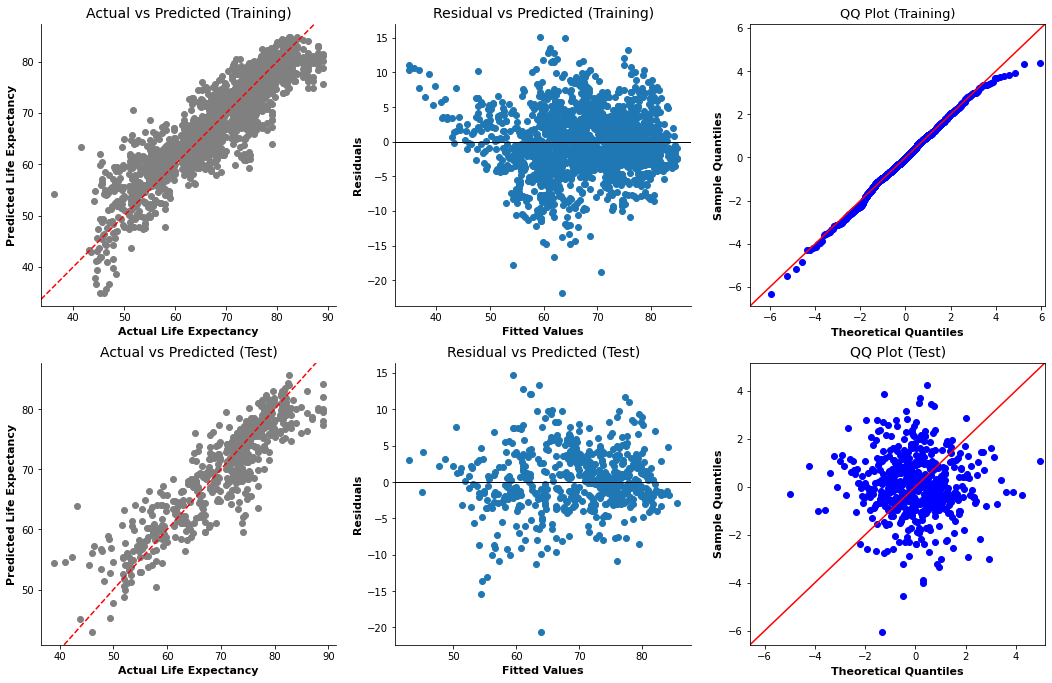

In [56]:
sel = ['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
      'HIV_AIDS', 'Measles', 'Status_Dummy',
      'Schooling', 'Incomecompositionofresources']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-1.2 : (y = intercept + AdultMortality + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + HIV_AIDS + Measles + Status_Dummy + Schooling + Incomecompositionofresources + epsilon) model__

__Iteration-1.3 : Fit thinness1_19years_log (y = intercept + AdultMortality + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + HIV_AIDS + Measles + Status_Dummy + Schooling + Incomecompositionofresources + epsilon) model__

In [57]:
# features
X_iter = X_train[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                 'HIV_AIDS', 'Measles', 'Status_Dummy',
                 'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log']]
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
                  'HIV_AIDS', 'Measles', 'Status_Dummy',
                  'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     823.9
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:54   Log-Likelihood:                -6680.2
No. Observations:                2350   AIC:                         1.339e+04
Df Residuals:                    2337   BIC:                         1.346e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

__Print VIF values of explanatory variables__

In [58]:
get_vif(exogs=['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'GDP', 'Population', 'HIV_AIDS',
              'Measles', 'Status_Dummy',
              'Schooling', 'Incomecompositionofresources',
              'thinness1_19years_log'], data=X_iter).iloc[:, 0]

AdultMortality                  1.782655
Totalexpenditure                1.170429
underfivedeaths_t_log           1.982551
BMI                             1.769170
GDP                             1.422441
Population                      1.118187
HIV_AIDS                        1.400445
Measles                         1.218532
Status_Dummy                    1.625802
Schooling                       3.402752
Incomecompositionofresources    3.170552
thinness1_19years_log           1.787463
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-1.3__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 4.152
Testing RMSE is 4.265
Goldfeld Quandt test results are: 
 [('F statistic', 1.1119161111740286), ('p-value', 0.035357561940703955)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 287.0311452254986), ('p-value', 2.4693438076449926e-54), ('f-value', 27.09653875931931), ('f p-value', 4.019682120853227e-58)]


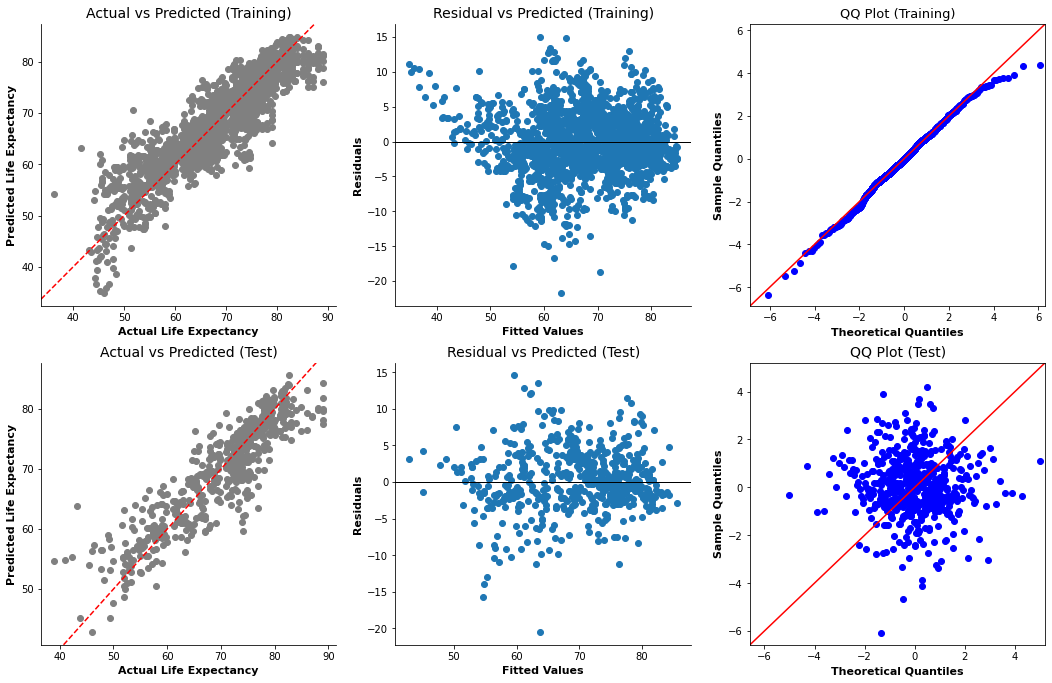

In [59]:
sel = ['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'GDP', 'Population',
      'HIV_AIDS', 'Measles', 'Status_Dummy',
      'Schooling', 'Incomecompositionofresources',
      'thinness1_19years_log']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-1.3 : (y = intercept + AdultMortality + Totalexpenditure + log(underfivedeaths+1) + BMI + GDP + Population + HIV_AIDS + Measles + Status_Dummy + Schooling + Incomecompositionofresources + log(thinness1_19years) + epsilon) model__

__Check how much the coefficients are explainable despite of right direction__

In [60]:
print(model.params)
for i in model.params.values:
    print(format(float(i), '.7f'))

const                           6.123548e+01
AdultMortality                 -1.845485e-02
Totalexpenditure                1.416307e-01
underfivedeaths_t_log          -1.144758e+00
BMI                             3.805477e-02
GDP                             3.403574e-05
Population                      9.648684e-09
HIV_AIDS                       -4.614015e-01
Measles                        -2.754576e-05
Status_Dummy                    1.271843e+00
Schooling                       4.741162e-01
Incomecompositionofresources    8.896094e+00
thinness1_19years_log          -1.711796e-01
dtype: float64
61.2354846
-0.0184548
0.1416307
-1.1447584
0.0380548
0.0000340
0.0000000
-0.4614015
-0.0000275
1.2718434
0.4741162
8.8960945
-0.1711796


 - __The coefficient or GDP is 0.000034, Population is 0.0000. Any macro economic attribute would have very small beta value__
 - __The coefficient for Measles is -0.0000275 which is also very low__
 - __Macro economic factor are directly uncontrollable as levers to tweak response variable__
 - __Measles is directionally okay but such low value is hard to explain in terms of impact__
 - __Therefore dropping them to see if we get similar adjusted R square without their presence in model__

In [61]:
# features
X_iter = X_train[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
                 'HIV_AIDS', 'Status_Dummy',
                 'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
                  'HIV_AIDS', 'Status_Dummy',
                  'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1065.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:57   Log-Likelihood:                -6710.5
No. Observations:                2350   AIC:                         1.344e+04
Df Residuals:                    2340   BIC:                         1.350e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

__Print VIF values of explanatory variables__

In [62]:
get_vif(exogs=['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'HIV_AIDS',
              'Status_Dummy',
              'Schooling', 'Incomecompositionofresources',
              'thinness1_19years_log'], data=X_iter).iloc[:, 0]

AdultMortality                  1.751986
Totalexpenditure                1.163139
underfivedeaths_t_log           1.619965
BMI                             1.763734
HIV_AIDS                        1.399054
Status_Dummy                    1.509049
Schooling                       3.337203
Incomecompositionofresources    3.082025
thinness1_19years_log           1.781642
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-1.4, there is not major loss in dropping GDP, Population and Measles__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 4.206
Testing RMSE is 4.252
Goldfeld Quandt test results are: 
 [('F statistic', 1.1160846488310452), ('p-value', 0.03050414944070138)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 273.4523251951853), ('p-value', 1.1005157207953797e-53), ('f-value', 34.238368525505194), ('f p-value', 3.604213555055142e-57)]


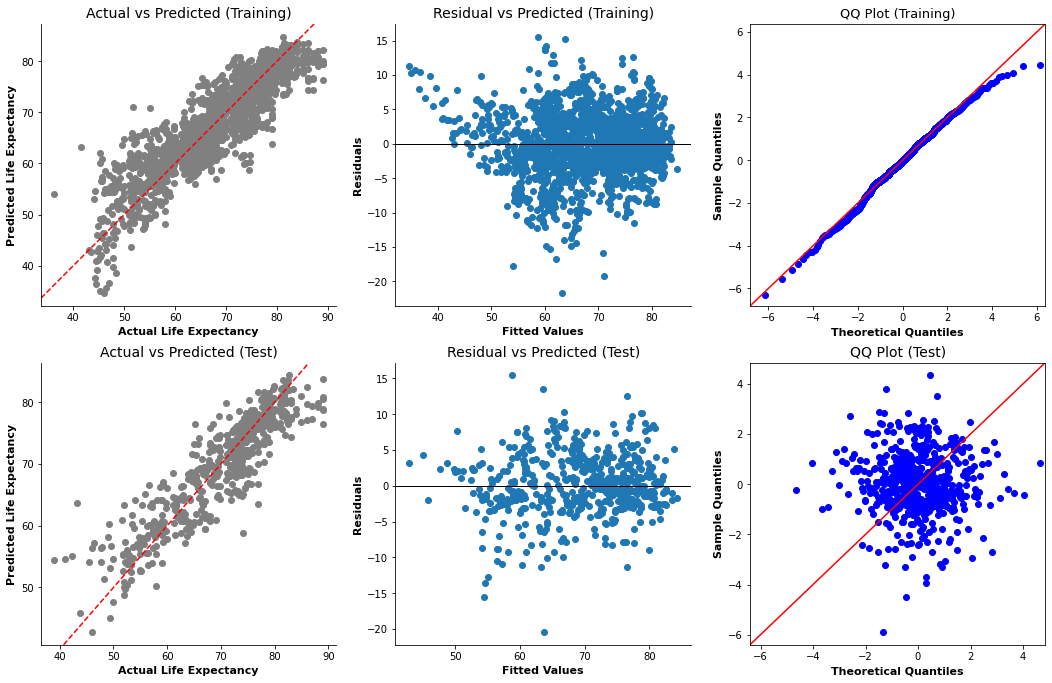

In [63]:
sel = ['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
      'HIV_AIDS', 'Status_Dummy',
      'Schooling', 'Incomecompositionofresources',
      'thinness1_19years_log']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-1.4 : (y = intercept + AdultMortality + Totalexpenditure + log(underfivedeaths+1) + BMI + HIV_AIDS + Status_Dummy + Schooling + Incomecompositionofresources + log(thinness1_19years) + epsilon) model__

 - __Currently the gap between training and testing RMSE is lesser than previous iterations__
 - __Hence the issue of over-fitting is relatively less now__
 - __Goldfeld Quandt test p-value is less than 0.05 implying Heteroskedastic errors are not present__

In [64]:
# print(model.aic)

In [65]:
print(model.params)
for i in model.params.values:
    print(format(float(i), '.7f'))

const                           61.124272
AdultMortality                  -0.018832
Totalexpenditure                 0.132868
underfivedeaths_t_log           -1.146922
BMI                              0.039676
HIV_AIDS                        -0.461556
Status_Dummy                     1.603514
Schooling                        0.471942
Incomecompositionofresources     9.599489
thinness1_19years_log           -0.170904
dtype: float64
61.1242724
-0.0188317
0.1328684
-1.1469216
0.0396761
-0.4615555
1.6035142
0.4719422
9.5994892
-0.1709039


__Fit Polio and Diptheria__

__Iteration-1.5 : Fit Polio to (y = intercept + AdultMortality + Totalexpenditure + log(underfivedeaths+1) + BMI + HIV_AIDS + Status_Dummy + Schooling + Incomecompositionofresources + log(thinness1_19years) + epsilon) model__

In [66]:
# features
X_iter = X_train[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
                 'HIV_AIDS', 'Status_Dummy',
                 'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log',
                 'Polio']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
                  'HIV_AIDS', 'Status_Dummy',
                  'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log',
                  'Polio']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1024.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:31:59   Log-Likelihood:                -6647.2
No. Observations:                2350   AIC:                         1.332e+04
Df Residuals:                    2339   BIC:                         1.338e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

__Print VIF values of explanatory variables__

In [67]:
get_vif(exogs=['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'HIV_AIDS',
              'Status_Dummy',
              'Schooling', 'Incomecompositionofresources',
              'thinness1_19years_log', 'Polio'], data=X_iter).iloc[:, 0]

AdultMortality                  1.755249
Totalexpenditure                1.167476
underfivedeaths_t_log           1.692079
BMI                             1.772958
HIV_AIDS                        1.400095
Status_Dummy                    1.509103
Schooling                       3.361270
Incomecompositionofresources    3.102235
thinness1_19years_log           1.805451
Polio                           1.273587
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-1.5, there is not major loss in dropping GDP, Population and Measles__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 4.095
Testing RMSE is 4.154
Goldfeld Quandt test results are: 
 [('F statistic', 1.1427827362647665), ('p-value', 0.011440025809016437)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 274.10355805474063), ('p-value', 4.563136472197758e-53), ('f-value', 30.884402966135262), ('f p-value', 1.5218818316619047e-56)]


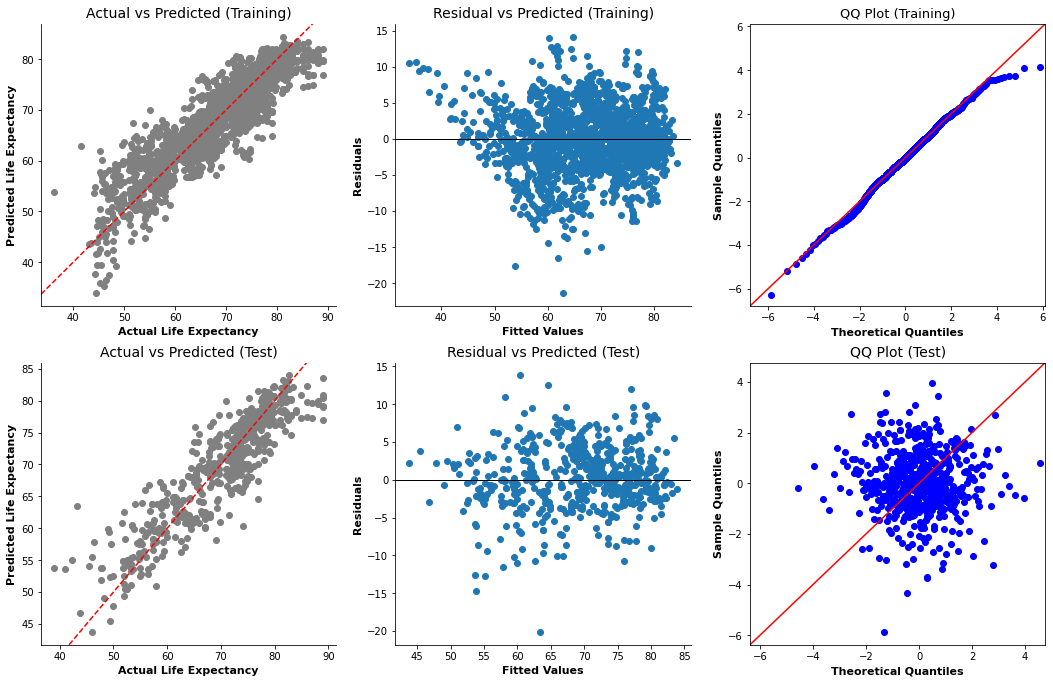

In [68]:
sel = ['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
      'HIV_AIDS', 'Status_Dummy',
      'Schooling', 'Incomecompositionofresources',
      'thinness1_19years_log', 'Polio']
rmse_print()
test_heterosk()
plot_model_results()

__Iteration-1.6 : Fit Diptheria to (y = intercept + AdultMortality + Totalexpenditure + log(underfivedeaths+1) + BMI + HIV_AIDS + Status_Dummy + Schooling + Incomecompositionofresources + log(thinness1_19years) + Polio + epsilon) model__

In [69]:
# features
X_iter = X_train[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
                 'HIV_AIDS', 'Status_Dummy',
                 'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log',
                 'Polio', 'Diphtheria']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
                  'HIV_AIDS', 'Status_Dummy',
                  'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log',
                  'Polio', 'Diphtheria']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     961.4
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:32:02   Log-Likelihood:                -6616.2
No. Observations:                2350   AIC:                         1.326e+04
Df Residuals:                    2338   BIC:                         1.333e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

__Print VIF values of explanatory variables__

In [70]:
get_vif(exogs=['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'HIV_AIDS',
              'Status_Dummy',
              'Schooling', 'Incomecompositionofresources',
              'thinness1_19years_log', 'Polio', 'Diphtheria'], data=X_iter).iloc[:, 0]

AdultMortality                  1.758502
Totalexpenditure                1.168614
underfivedeaths_t_log           1.700872
BMI                             1.773548
HIV_AIDS                        1.400109
Status_Dummy                    1.509113
Schooling                       3.366525
Incomecompositionofresources    3.109781
thinness1_19years_log           1.808584
Polio                           1.940596
Diphtheria                      1.906915
Name: VIF, dtype: float64

 - __Print RMSE values for Iteration-1.6, there is not major loss in dropping GDP, Population and Measles__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

Training RMSE is 4.041
Testing RMSE is 4.089
Goldfeld Quandt test results are: 
 [('F statistic', 1.141470738314084), ('p-value', 0.012070059134284414)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 245.9657019459621), ('p-value', 1.9530908034645647e-46), ('f-value', 24.846977053105814), ('f p-value', 3.6716215395735344e-49)]


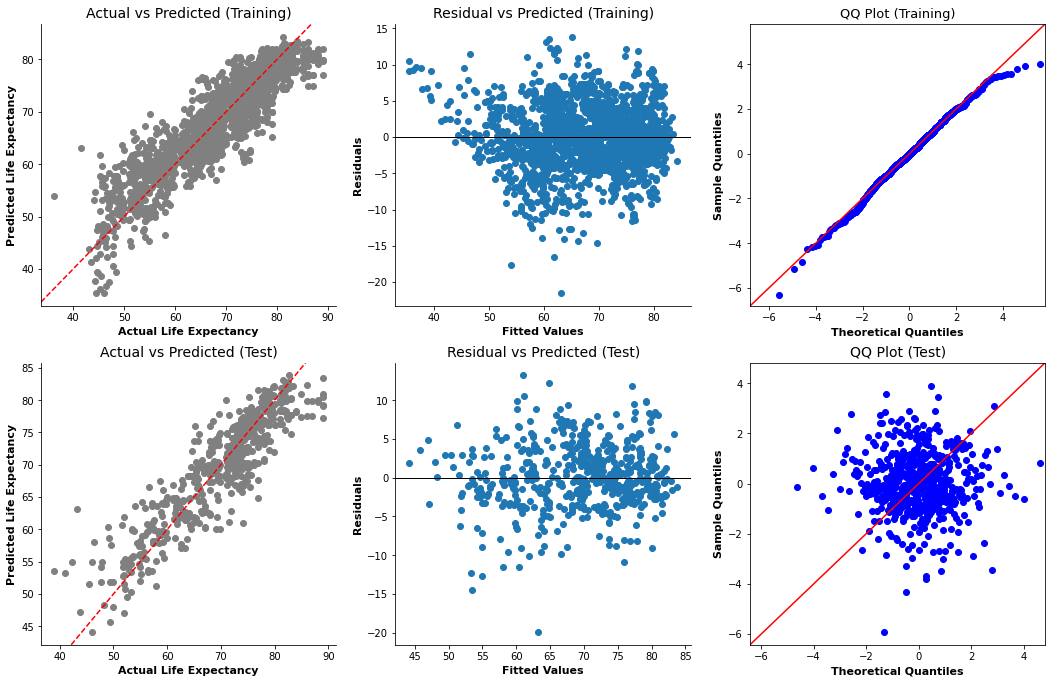

In [71]:
sel = ['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
      'HIV_AIDS', 'Status_Dummy',
      'Schooling', 'Incomecompositionofresources',
      'thinness1_19years_log', 'Polio', 'Diphtheria']
rmse_print()
test_heterosk()
plot_model_results()

In [72]:
print(model.params)
for i in model.params.values:
    print(format(float(i), '.7f'))

const                           57.580129
AdultMortality                  -0.018091
Totalexpenditure                 0.097975
underfivedeaths_t_log           -0.966461
BMI                              0.034242
HIV_AIDS                        -0.455323
Status_Dummy                     1.590248
Schooling                        0.412698
Incomecompositionofresources     8.659171
thinness1_19years_log           -0.349187
Polio                            0.023001
Diphtheria                       0.037832
dtype: float64
57.5801292
-0.0180910
0.0979750
-0.9664606
0.0342416
-0.4553233
1.5902477
0.4126981
8.6591709
-0.3491874
0.0230011
0.0378320


__Plot log transformations of log(GDP) and log(Population)__

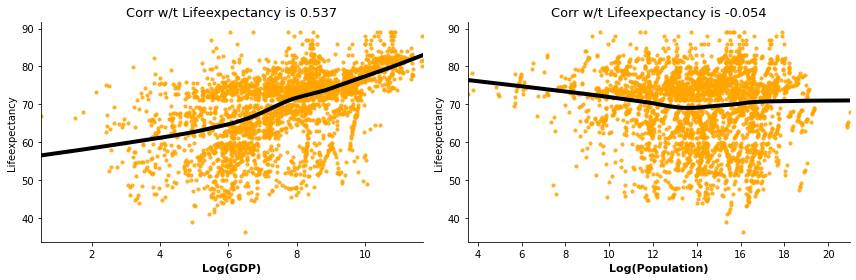

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
fig.subplots_adjust(top=0.7)
#Chart-0 plotting, Row-1, Column-1
sns.regplot(
    df_selectcols.GDP_log,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[0]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "GDP_log"]].corr().iloc[0,1],3)
ax[0].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_xlabel('Log(GDP)', fontsize=11, weight='bold')

sns.regplot(
    df_selectcols.Population_log,
    df_selectcols.Lifeexpectancy,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":10, "color":"orange"},
    line_kws={"lw":4, "color":"black"},
    ax=ax[1]
    )
a = round(df_selectcols.loc[:, ["Lifeexpectancy", "Population_log"]].corr().iloc[0,1],3)
ax[1].set_title(f"Corr w/t Lifeexpectancy is {a}", fontsize=13)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xlabel('Log(Population)', fontsize=11, weight='bold')

fig.tight_layout()
plt.show()

__Iteration to check how log of macro economic variables fit in above model__

In [74]:
# features
X_iter = X_train[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
                 'HIV_AIDS', 'Status_Dummy',
                 'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log',
                 'Polio', 'Diphtheria',
                 'GDP_log']] 
# adding a constant
X_iter = sm.add_constant(X_iter)
# applying method of least squares
model = sm.OLS(y_train, X_iter).fit()

X_iter_p = X_test[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
                  'HIV_AIDS', 'Status_Dummy',
                  'Schooling', 'Incomecompositionofresources', 'thinness1_19years_log',
                  'Polio', 'Diphtheria',
                  'GDP_log']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     893.9
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:32:13   Log-Likelihood:                -6602.1
No. Observations:                2350   AIC:                         1.323e+04
Df Residuals:                    2337   BIC:                         1.331e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

__Print VIF values of explanatory variables__

In [75]:
get_vif(exogs=['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log',
              'BMI', 'HIV_AIDS',
              'Status_Dummy',
              'Schooling', 'Incomecompositionofresources',
              'thinness1_19years_log', 'Polio', 'Diphtheria',
              'GDP_log'], data=X_iter).iloc[:, 0]

AdultMortality                  1.758635
Totalexpenditure                1.168723
underfivedeaths_t_log           1.734916
BMI                             1.781983
HIV_AIDS                        1.401043
Status_Dummy                    1.541196
Schooling                       3.427658
Incomecompositionofresources    3.224428
thinness1_19years_log           1.810343
Polio                           1.940631
Diphtheria                      1.907340
GDP_log                         1.636702
Name: VIF, dtype: float64

__Print train and test results__

Training RMSE is 4.017
Testing RMSE is 4.083
Goldfeld Quandt test results are: 
 [('F statistic', 1.1223432910138245), ('p-value', 0.024635723547971715)]
Breusch Pagan test results are: 
 [('Lagrange multiplier statistic', 251.34113055057972), ('p-value', 7.185205419830387e-47), ('f-value', 23.323793060073186), ('f p-value', 1.0530101023643613e-49)]


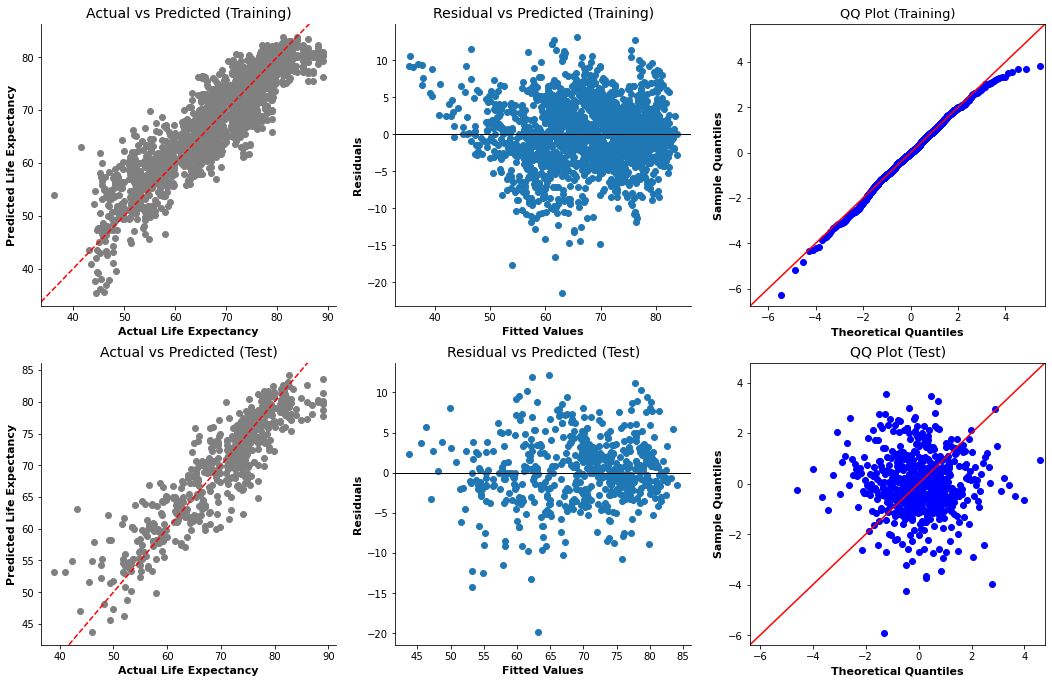

In [76]:
sel = ['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI',
      'HIV_AIDS', 'Status_Dummy',
      'Schooling', 'Incomecompositionofresources',
      'thinness1_19years_log', 'Polio', 'Diphtheria',
      'GDP_log']
rmse_print()
test_heterosk()
plot_model_results()

In [77]:
print(model.params)
for i in model.params.values:
    print(format(float(i), '.7f'))

const                           56.085104
AdultMortality                  -0.018132
Totalexpenditure                 0.099849
underfivedeaths_t_log           -0.920602
BMI                              0.032211
HIV_AIDS                        -0.452814
Status_Dummy                     1.378812
Schooling                        0.379920
Incomecompositionofresources     7.935742
thinness1_19years_log           -0.366976
Polio                            0.022891
Diphtheria                       0.038209
GDP_log                          0.311236
dtype: float64
56.0851037
-0.0181317
0.0998495
-0.9206024
0.0322115
-0.4528142
1.3788120
0.3799195
7.9357425
-0.3669760
0.0228915
0.0382093
0.3112356


__Plot Actual Response vs Predicted Response along Prediction and Confidence Intervals__

In [78]:
from statsmodels.stats.outliers_influence import summary_table

In [79]:
st, data, ss2 = summary_table(model, alpha=0.05)

##Source Code:https://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels/17560456
###From Here
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T
###To Here


a1 = pd.DataFrame(y_train.values, columns=['Actual'])
a2 = pd.DataFrame(fittedvalues.reshape(-1,1), columns=['Predicted'])
a3 = pd.DataFrame(predict_mean_ci_low.reshape(-1,1), columns=['Predicted_Low'])
a4 = pd.DataFrame(predict_mean_ci_upp.reshape(-1,1), columns=['Predicted_Upper'])
a5 = pd.DataFrame(predict_ci_low.reshape(-1,1), columns=['CI_Low'])
a6 = pd.DataFrame(predict_ci_upp.reshape(-1,1), columns=['CI_Upper'])
mydata = pd.concat([a1,a2,a3,a4,a5,a6], axis=1)

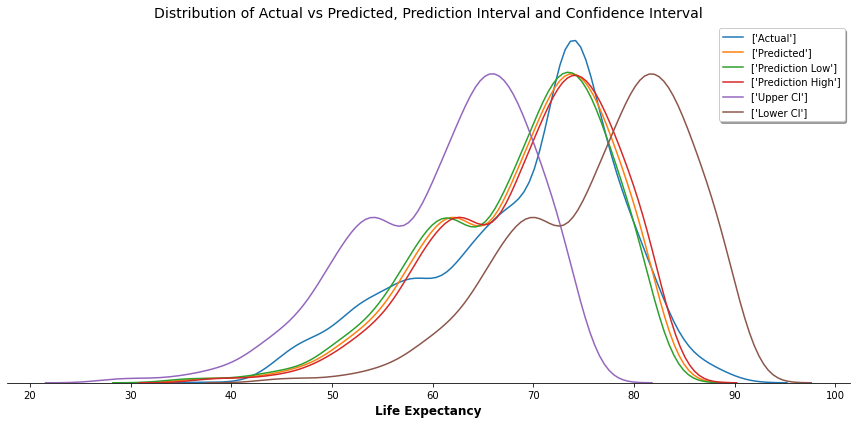

In [80]:
fig, ax = plt.subplots(figsize=(12,6))
fig.subplots_adjust(top=0.7)

sns.distplot(mydata.Actual, hist=False, kde=True, ax=ax, label=["Actual"])
sns.distplot(mydata.Predicted, hist=False, kde=True, ax=ax, label=["Predicted"])
sns.distplot(mydata.Predicted_Low, hist=False, kde=True, ax=ax, label=["Prediction Low"])
sns.distplot(mydata.Predicted_Upper, hist=False, kde=True, ax=ax, label=["Prediction High"])
sns.distplot(mydata.CI_Low, hist=False, kde=True, ax=ax, label=["Upper CI"])
sns.distplot(mydata.CI_Upper, hist=False, kde=True, ax=ax, label=["Lower CI"]);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_xlabel('Life Expectancy', fontsize=12, weight='bold')
ax.set_title('Distribution of Actual vs Predicted, Prediction Interval and Confidence Interval', fontsize=14)
ax.legend(loc='best', shadow=True,fontsize='medium')

fig.tight_layout()
plt.show()

__Print final model beta values__

In [81]:
print(model.params)
for i in model.params.values:
    print(format(float(i), '.7f'))

const                           56.085104
AdultMortality                  -0.018132
Totalexpenditure                 0.099849
underfivedeaths_t_log           -0.920602
BMI                              0.032211
HIV_AIDS                        -0.452814
Status_Dummy                     1.378812
Schooling                        0.379920
Incomecompositionofresources     7.935742
thinness1_19years_log           -0.366976
Polio                            0.022891
Diphtheria                       0.038209
GDP_log                          0.311236
dtype: float64
56.0851037
-0.0181317
0.0998495
-0.9206024
0.0322115
-0.4528142
1.3788120
0.3799195
7.9357425
-0.3669760
0.0228915
0.0382093
0.3112356


__Plot trend of model stats from above iteration__

In [82]:
url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/articles/ra_model_iter_stats.csv"
model_iters = pd.read_csv(url, error_bad_lines = False, header=0, index_col=None)
model_iters.head(4)

Iter  Adjusted_R2  F_Statistic       AIC  Train_RMSE  Test_RMSE  Avg_VIF  \
0     1        0.488       2241.0  15677.93       6.793      6.979    0.000   
1     2        0.556       1474.0  15342.81       6.323      6.354    1.041   
2     3        0.560        998.8  15322.53       6.293      6.349    1.086   
3     4        0.647       1078.0  14806.10       5.636      5.757    1.220   

   MAX_VIF  p-value    Gap  
0    0.000    0.056  0.186  
1    1.041    0.005  0.031  
2    1.121    0.005  0.056  
3    1.348    0.078  0.121

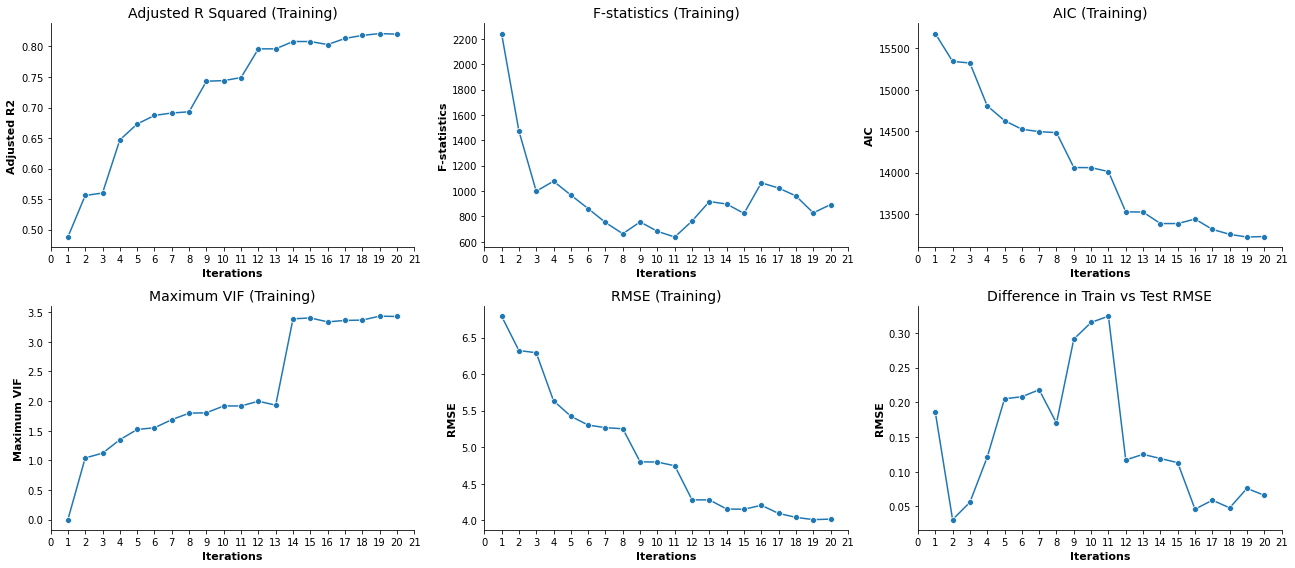

In [83]:
fig, ax = plt.subplots(2, 3, figsize=(18,8))
# fig, ax = plt.subplots(figsize=(6,4))
fig.subplots_adjust(top=0.7)

##Chart-0, Row-1, Column-1
sns.lineplot(x='Iter', y='Adjusted_R2', data=model_iters, marker="o", ax=ax[0,0])
ax[0,0].set_aspect('auto')
ax[0,0].set_xlim(xmin=0, xmax=16)
ax[0,0].set_xbound(lower=0, upper=16)
ax[0,0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[0,0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[0,0].set_title("Adjusted R Squared (Training)", fontsize=14)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].set_xlabel('Iterations', fontsize=11, weight='bold')
ax[0,0].set_ylabel('Adjusted R2', fontsize=11, weight='bold')
# ax[0,0].axvline(x=12, color='black', linestyle='dashdot', linewidth=1)
# ax[0,0].axvline(x=13, color='brown', linestyle='solid', linewidth=1)
# ax[0,0].axvline(x=16, color='red', linestyle='solid', linewidth=1)
# ax[0,0].axvline(x=20, color='green', linestyle='--', linewidth=1);

##Chart-1 Row-1, Column-2
sns.lineplot(x='Iter', y='F_Statistic', data=model_iters, marker="o", ax=ax[0,1])
ax[0,1].set_aspect('auto')
ax[0,1].set_xlim(xmin=0, xmax=16)
ax[0,1].set_xbound(lower=0, upper=16)
ax[0,1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[0,1].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[0,1].set_title("F-statistics (Training)", fontsize=14)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].set_xlabel('Iterations', fontsize=11, weight='bold')
ax[0,1].set_ylabel('F-statistics', fontsize=11, weight='bold')
# ax[0,1].axvline(x=12, color='black', linestyle='dashdot', linewidth=1)
# ax[0,1].axvline(x=13, color='brown', linestyle='solid', linewidth=1)
# ax[0,1].axvline(x=16, color='red', linestyle='solid', linewidth=1)
# ax[0,1].axvline(x=20, color='green', linestyle='--', linewidth=1);

##Chart-2 Row-1, Column-3
sns.lineplot(x='Iter', y='AIC', data=model_iters, marker="o", ax=ax[0,2])
ax[0,2].set_aspect('auto')
ax[0,2].set_xlim(xmin=0, xmax=16)
ax[0,2].set_xbound(lower=0, upper=16)
ax[0,2].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[0,2].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[0,2].set_title("AIC (Training)", fontsize=14)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].set_xlabel('Iterations', fontsize=11, weight='bold')
ax[0,2].set_ylabel('AIC', fontsize=11, weight='bold')
# ax[0,2].axvline(x=12, color='black', linestyle='dashdot', linewidth=1)
# ax[0,2].axvline(x=13, color='brown', linestyle='solid', linewidth=1)
# ax[0,2].axvline(x=16, color='red', linestyle='solid', linewidth=1)
# ax[0,2].axvline(x=20, color='green', linestyle='--', linewidth=1);


##Chart-3 Row-2, Column-1
sns.lineplot(x='Iter', y='MAX_VIF', data=model_iters, marker="o", ax=ax[1,0])
ax[1,0].set_aspect('auto')
ax[1,0].set_xlim(xmin=0, xmax=16)
ax[1,0].set_xbound(lower=0, upper=16)
ax[1,0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[1,0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[1,0].set_title("Maximum VIF (Training)", fontsize=14)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].set_xlabel('Iterations', fontsize=11, weight='bold')
ax[1,0].set_ylabel('Maximum VIF', fontsize=11, weight='bold')
# ax[1,0].axvline(x=12, color='black', linestyle='dashdot', linewidth=1)
# ax[1,0].axvline(x=13, color='brown', linestyle='solid', linewidth=1)
# ax[1,0].axvline(x=16, color='red', linestyle='solid', linewidth=1)
# ax[1,0].axvline(x=20, color='green', linestyle='--', linewidth=1);

##Chart-4 Row-2, Column-2
sns.lineplot(x='Iter', y='Train_RMSE', data=model_iters, marker="o", ax=ax[1,1])
ax[1,1].set_aspect('auto')
ax[1,1].set_xlim(xmin=0, xmax=16)
ax[1,1].set_xbound(lower=0, upper=16)
ax[1,1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[1,1].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[1,1].set_title("RMSE (Training)", fontsize=14)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].set_xlabel('Iterations', fontsize=11, weight='bold')
ax[1,1].set_ylabel('RMSE', fontsize=11, weight='bold')
# ax[1,1].axvline(x=12, color='black', linestyle='dashdot', linewidth=1)
# ax[1,1].axvline(x=13, color='brown', linestyle='solid', linewidth=1)
# ax[1,1].axvline(x=16, color='red', linestyle='solid', linewidth=1)
# ax[1,1].axvline(x=20, color='green', linestyle='--', linewidth=1);

##Chart-5 Row-2, Column-3
sns.lineplot(x='Iter', y='Gap', data=model_iters, marker="o", ax=ax[1,2])
ax[1,2].set_aspect('auto')
ax[1,2].set_xlim(xmin=0, xmax=16)
ax[1,2].set_xbound(lower=0, upper=16)
ax[1,2].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[1,2].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax[1,2].set_title("Difference in Train vs Test RMSE", fontsize=14)
ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].set_xlabel('Iterations', fontsize=11, weight='bold')
ax[1,2].set_ylabel('RMSE', fontsize=11, weight='bold')
# ax[1,2].axvline(x=12, color='black', linestyle='dashdot', linewidth=1)
# ax[1,2].axvline(x=13, color='brown', linestyle='solid', linewidth=1)
# ax[1,2].axvline(x=16, color='red', linestyle='solid', linewidth=1)
# ax[1,2].axvline(x=20, color='green', linestyle='--', linewidth=1);

fig.tight_layout()
plt.show()

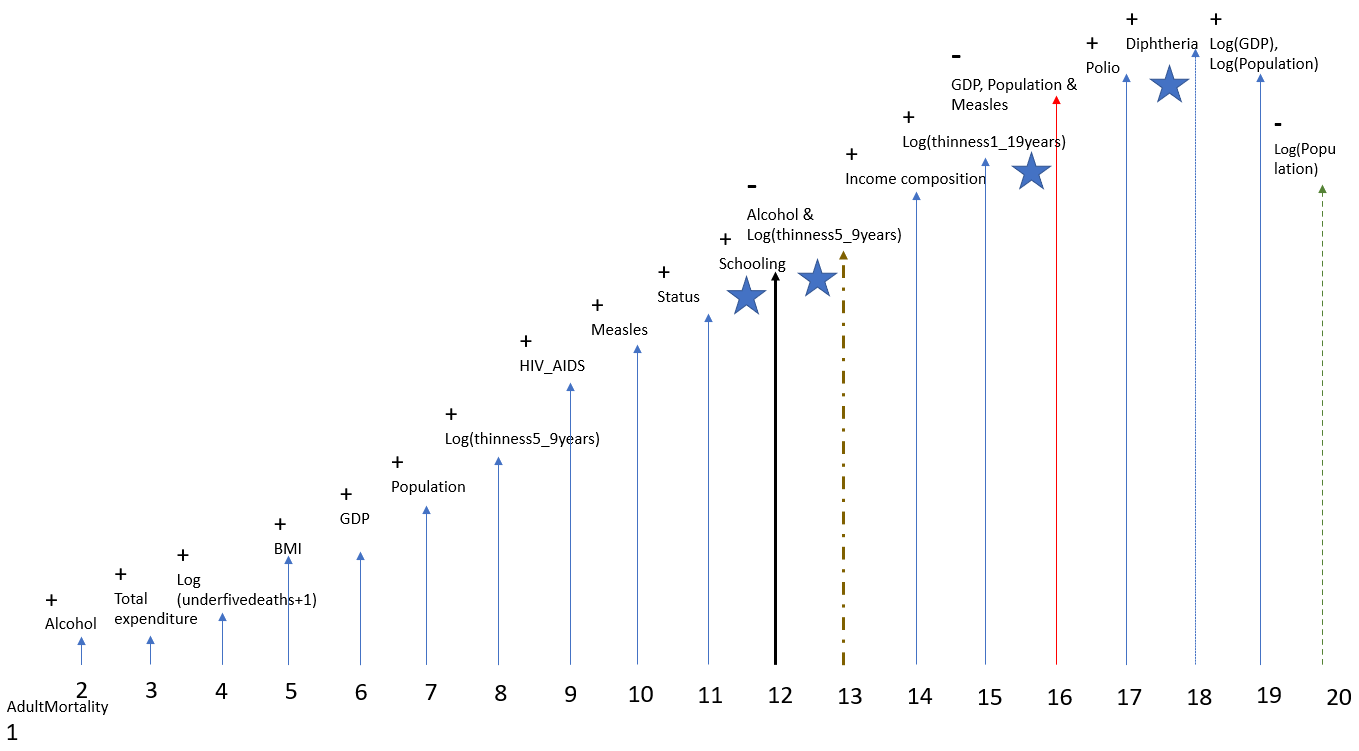

__AdultMortality split by Developed (1) and Developing (0) Status of country__

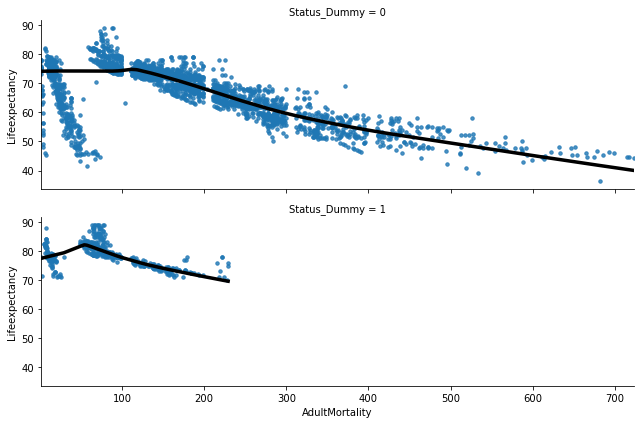

In [84]:
lm = sns.lmplot(
    x='AdultMortality',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__infantdeaths split by Developed (1) and Developing (0) Status of country__

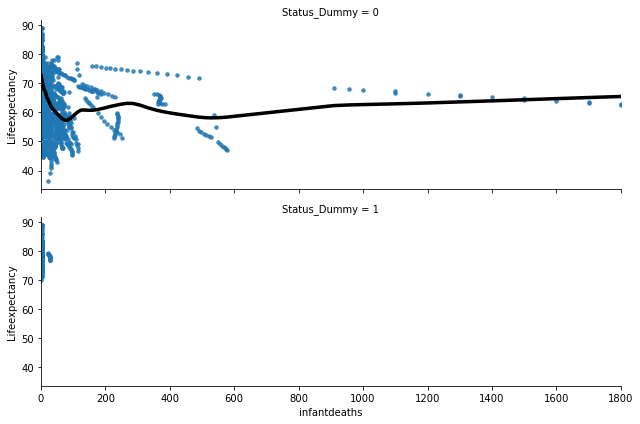

In [85]:
lm = sns.lmplot(
    x='infantdeaths',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__Alcohol split by Developed (1) and Developing (0) Status of country__

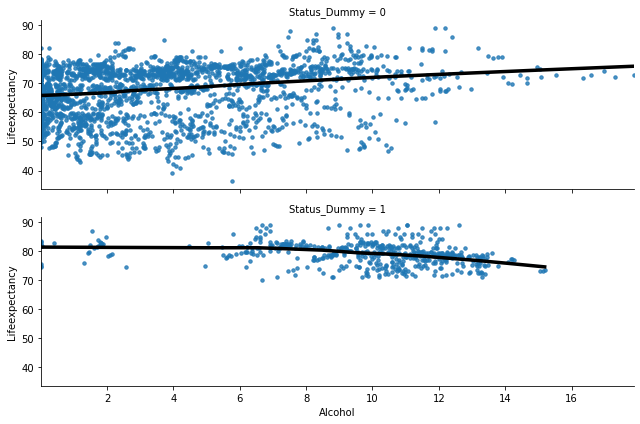

In [86]:
lm = sns.lmplot(
    x='Alcohol',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__percentageexpenditure split by Developed (1) and Developing (0) Status of country__

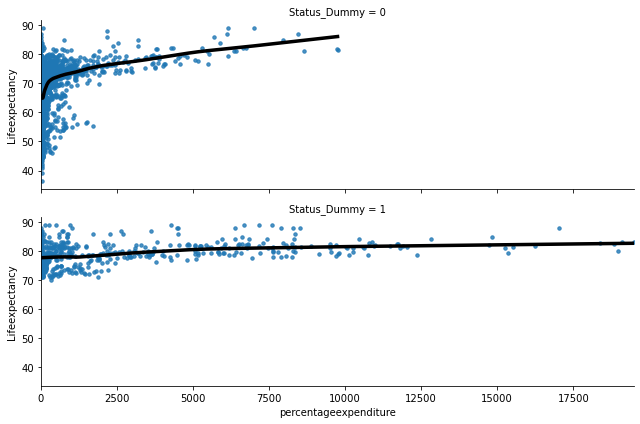

In [87]:
lm = sns.lmplot(
    x='percentageexpenditure',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__HepatitisB split by Developed (1) and Developing (0) Status of country__

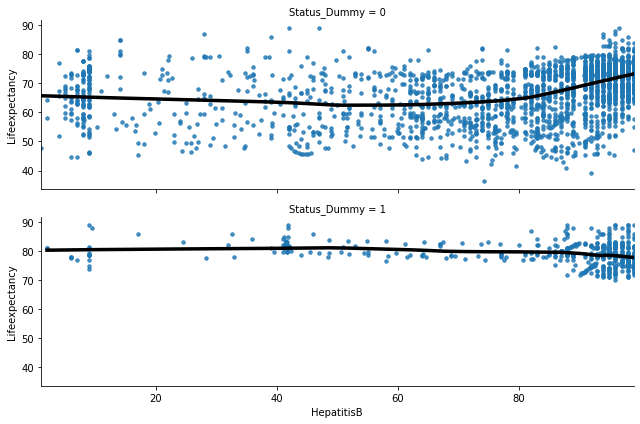

In [88]:
lm = sns.lmplot(
    x='HepatitisB',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__Measles split by Developed (1) and Developing (0) Status of country__

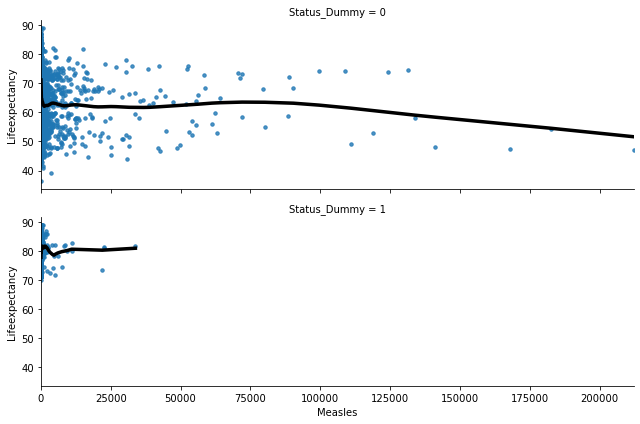

In [89]:
lm = sns.lmplot(
    x='Measles',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__BMI split by Developed (1) and Developing (0) Status of country__

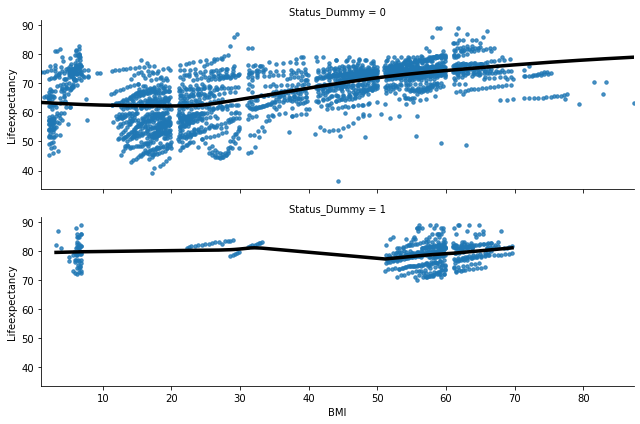

In [90]:
lm = sns.lmplot(
    x='BMI',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__under-fivedeaths split by Developed (1) and Developing (0) Status of country__

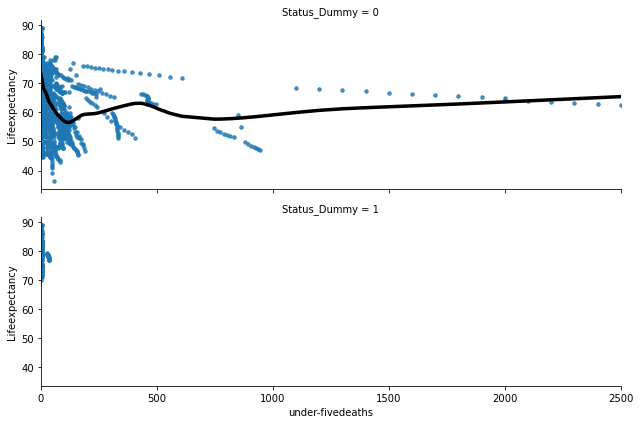

In [91]:
lm = sns.lmplot(
    x='under-fivedeaths',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__Polio split by Developed (1) and Developing (0) Status of country__

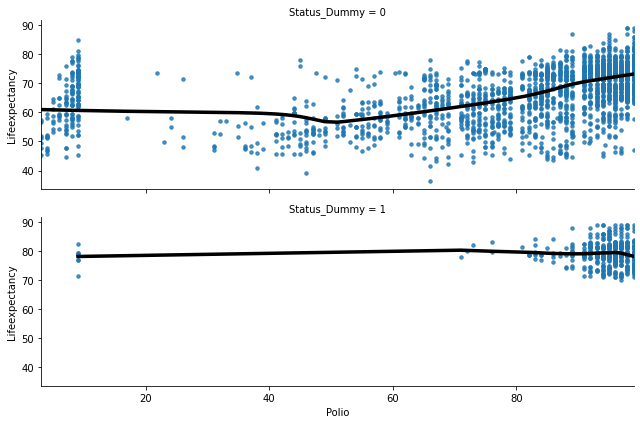

In [92]:
lm = sns.lmplot(
    x='Polio',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__Totalexpenditure split by Developed (1) and Developing (0) Status of country__

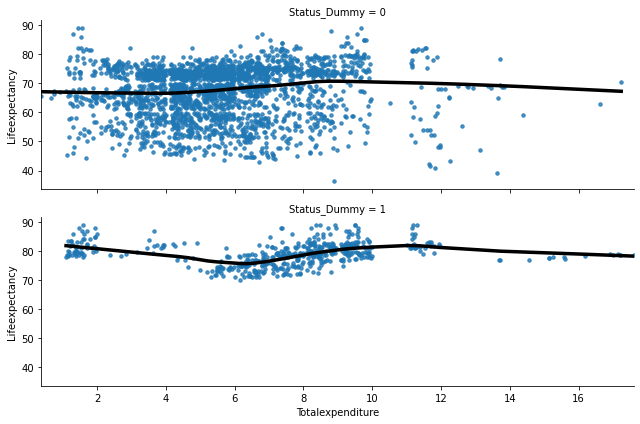

In [93]:
lm = sns.lmplot(
    x='Totalexpenditure',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__Diphtheria split by Developed (1) and Developing (0) Status of country__

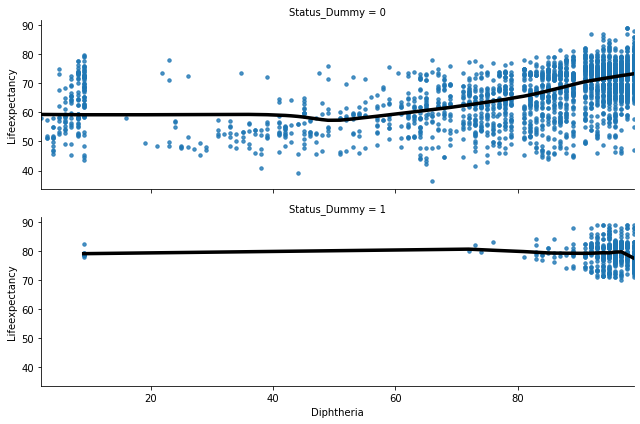

In [94]:
lm = sns.lmplot(
    x='Diphtheria',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__HIV/AIDS split by Developed (1) and Developing (0) Status of country__

C:\Users\Debjani\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


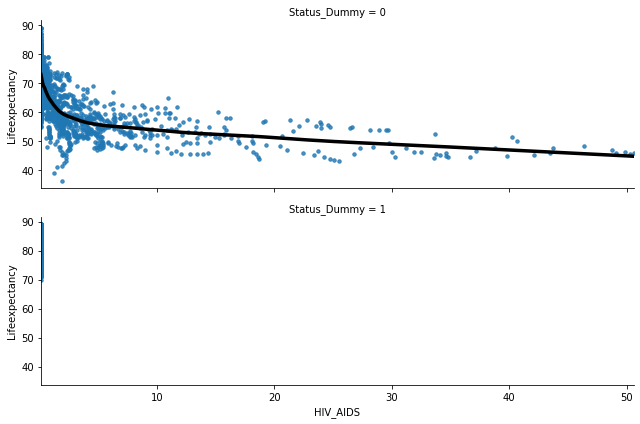

In [95]:
lm = sns.lmplot(
    x='HIV_AIDS',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__GDP split by Developed (1) and Developing (0) Status of country__

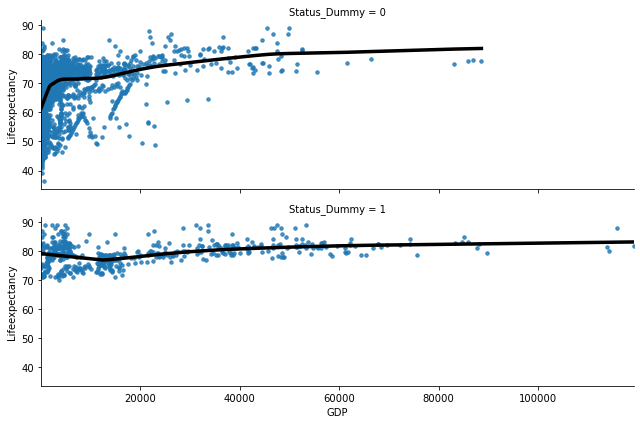

In [96]:
lm = sns.lmplot(
    x='GDP',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__Population split by Developed (1) and Developing (0) Status of country__

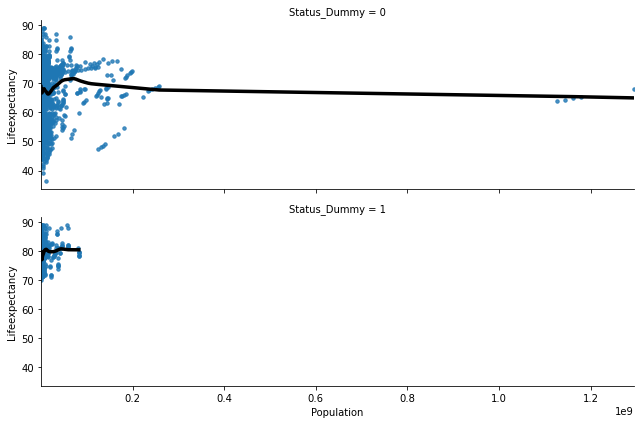

In [97]:
lm = sns.lmplot(
    x='Population',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__thinness1-19years split by Developed (1) and Developing (0) Status of country__

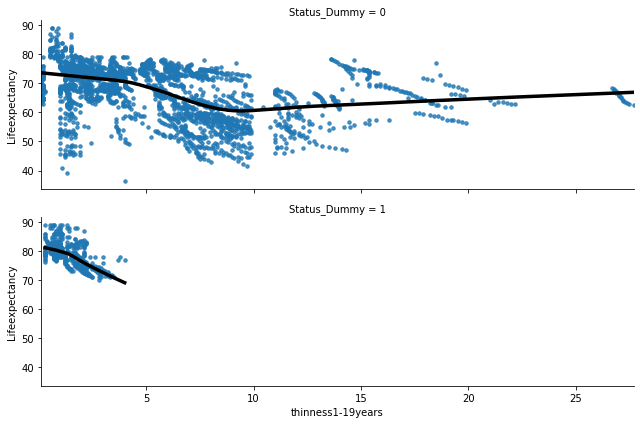

In [98]:
lm = sns.lmplot(
    x='thinness1-19years',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__thinness5-9years split by Developed (1) and Developing (0) Status of country__

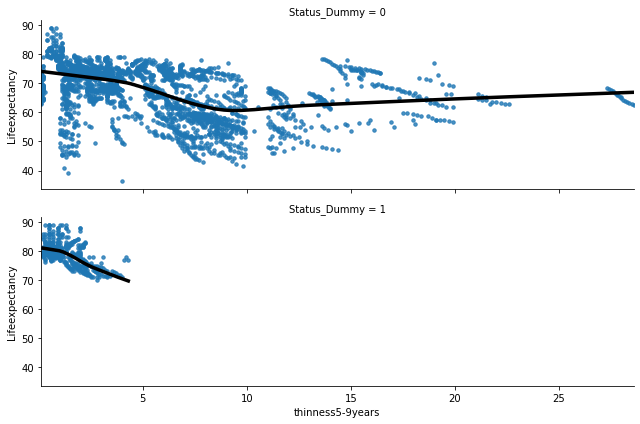

In [99]:
lm = sns.lmplot(
    x='thinness5-9years',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__Incomecompositionofresources split by Developed (1) and Developing (0) Status of country__

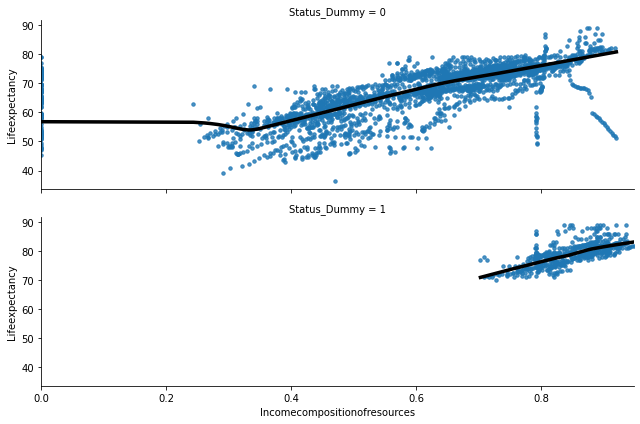

In [100]:
lm = sns.lmplot(
    x='Incomecompositionofresources',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__Schooling split by Developed (1) and Developing (0) Status of country__

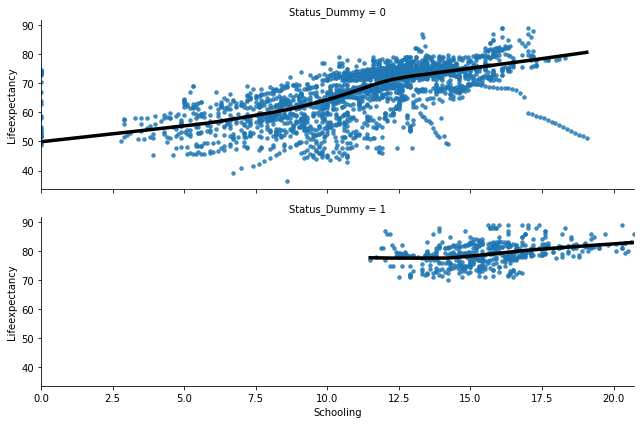

In [101]:
lm = sns.lmplot(
    x='Schooling',
    y='Lifeexpectancy',
    row='Status_Dummy',
    data=df_selectcols,
    scatter=True,
    fit_reg=True,
    lowess=True,
    scatter_kws={"s":12},
    line_kws={"lw":3.5, "color":"black"},
    legend_out=False,
    height=3, aspect=3
    )

__Steps to build separate model for Developed Countries__

In [102]:
# df_status_1 = df_selectcols.query('Status_Dummy==1')
# df_status_1.shape

In [103]:
# y_1 = df_status_1.loc[:, ["Lifeexpectancy"]]

# ##Dropping infantdeaths, infantdeaths_t_log, Schooling, Diphtheria, thinness1-19years, thinness1_19years_log, Polio
# ##thinness5-9years, under-fivedeaths, percentageexpenditure, Incomecompositionofresources
# X_1 = df_status_1.loc[:, ["AdultMortality", "Alcohol", "percentageexpenditure_t_log", "HepatitisB", "Measles",
#                          "BMI", "underfivedeaths_t_log", "Totalexpenditure", "HIV_AIDS", "GDP", "Population",
#                          "thinness5_9years_log", "Status_Dummy",
#                          "infantdeaths_t_log", "Schooling", "Diphtheria", "thinness1_19years_log", "Polio",
#                           "Incomecompositionofresources"]]

# ##Push 20% to test data
# X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

__Iteration-1 : Fit AdultMortality to y_1 = intercept + epsilon model__

In [104]:
# # features
# X_iter = X_train[['AdultMortality']] 
# # adding a constant
# X_iter = sm.add_constant(X_iter)
# # applying method of least squares
# model = sm.OLS(y_train, X_iter).fit()

# X_iter_p = X_test[['AdultMortality']]
# X_iter_p = sm.add_constant(X_iter_p)
# predictions = model.predict(X_iter_p)
    
# print(model.summary())
# print(model.aic)

 - __Print RMSE values for Iteration-1__
 - __Execute Heteroskedasticty tests [Goldfeld-Quandt test & Breush-Pagan test]__
 - __Plot model results__

In [105]:
# sel = ['AdultMortality']
# rmse_print()
# test_heterosk()
# plot_model_results()

__Iteration-2 : Fit Totalexpenditure to y_1 = intercept + AdultMortality + epsilon model__

In [106]:
# # features
# X_iter = X_train[['AdultMortality', 'Totalexpenditure']] 
# # adding a constant
# X_iter = sm.add_constant(X_iter)
# # applying method of least squares
# model = sm.OLS(y_train, X_iter).fit()

# X_iter_p = X_test[['AdultMortality', 'Totalexpenditure']]
# X_iter_p = sm.add_constant(X_iter_p)
# predictions = model.predict(X_iter_p)
    
# print(model.summary())
# print(model.aic)

__Iteration-2.1 : Fit log(underfivedeaths+1) to y_1 = intercept + AdultMortality + epsilon model__

In [107]:
# # features
# X_iter = X_train[['AdultMortality', 'underfivedeaths_t_log']] 
# # adding a constant
# X_iter = sm.add_constant(X_iter)
# # applying method of least squares
# model = sm.OLS(y_train, X_iter).fit()

# X_iter_p = X_test[['AdultMortality', 'underfivedeaths_t_log']]
# X_iter_p = sm.add_constant(X_iter_p)
# predictions = model.predict(X_iter_p)
    
# print(model.summary())
# print(model.aic)

__Try to build a separate Developed Nations model using all vars__

In [108]:
# # features
# X_iter = X_train[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'HIV_AIDS', 'Schooling',
#                   'Incomecompositionofresources', 'thinness1_19years_log', 'Polio', 'Diphtheria',
#                  'Alcohol', 'GDP', 'Population', 'Measles', 'HepatitisB']] 
# # adding a constant
# X_iter = sm.add_constant(X_iter)
# # applying method of least squares
# model = sm.OLS(y_train, X_iter).fit()

# X_iter_p = X_test[['AdultMortality', 'Totalexpenditure', 'underfivedeaths_t_log', 'BMI', 'HIV_AIDS', 'Schooling',
#                   'Incomecompositionofresources', 'thinness1_19years_log', 'Polio', 'Diphtheria',
#                   'Alcohol', 'GDP', 'Population', 'Measles', 'HepatitisB']]
# X_iter_p = sm.add_constant(X_iter_p)
# predictions = model.predict(X_iter_p)
    
# print(model.summary())
# print(model.aic)

 - __As of now there is little hope in moving ahead with anymore iterations for a separate model__
 - __Beta directions for Total Expenditure, BMI, HIV_AIDS, Schooling, Alcohol, GDP, Measles are opposite__

__Show Cross Validation__

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin

##Source: https://stackoverflow.com/questions/41045752/using-statsmodel-estimations-with-scikit-learn-cross-validation-is-it-possible
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

__Run 10 fold cross validation and evaluate RMSE on Training data with 2350 records__

In [110]:
MSE_scores = cross_val_score(SMWrapper(sm.OLS), X_iter, y_train, scoring='neg_mean_squared_error', cv=10)
RMSE_CV = (-MSE_scores.mean())**(1/2)
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 4.05


__Run 10 fold cross validation and evaluate RMSE on entire dataset with 2938 records__

In [111]:
X_combine = pd.concat([X_iter, X_iter_p], axis=0)
y_combine = pd.concat([y_train, y_test], axis=0)

In [112]:
MSE_scores = cross_val_score(SMWrapper(sm.OLS), X_combine, y_combine, scoring='neg_mean_squared_error', cv=10)
RMSE_CV = (-MSE_scores.mean())**(1/2)
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 4.05


 - __The RMSE on train set for the selected model was 4.017 and test set was 4.083__
 - __Test RMSE thus was 2% higher than train where there exists a slight overfitting__
 - __As a rule of thumb a difference more than 5% is significant, however it still depends on data and methodology__
 - __However the RMSE on 10 fold CV is 4.05 which is 1% lower than Test RMSE shown above__
 - __Hence the model can be assumed to have a major predictive value when tested on new data in comparison with the Train-Test Split Approach__

__On behalf of Group-A RA Project ePGD-ABA 20-21 batch__

__Thank You__